# Project Deliverable - 1  
**Subject:** Advanced Big Data and Data Mining (MSCS 634)  
**Student Name:** Chandra Kiran Billingi


In [234]:
# importing the necessary libraries to work on the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [235]:
# Loading dataset into pandas library for preprocessing
df = pd.read_csv('cardekho.csv')

# Preview data
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


                                  Exploring the Data

In [236]:
#shape of the data set
df.shape

(8128, 12)

In [237]:
#columns in the data set
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [238]:
#columns in the data set with their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


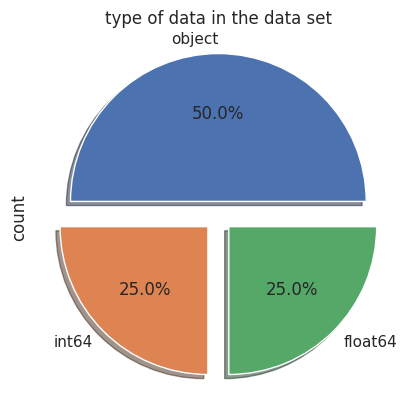

In [239]:
#pie chart of the data set with the types of data set
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of data in the data set');

In [240]:
#The description of the data set
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907.000000,7907.000000,7913,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,320,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,74,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,377,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.418783,1458.625016,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.037145,503.916303,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,NaN,5.000000


                                            Data Cleaning

In [241]:
#printing all the missing values in the data set and the number of rows tat were missing
df.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [242]:
# percentage of the missing values
df.isnull().sum()/len(df)*100

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage(km/ltr/kg),2.718996
engine,2.718996


so we can see that 2.71 % of the mileage,engine and the seats data are missing and the 2.71% of the max_power

In [243]:
# Handline Missing Mileage values

df['mileage(km/ltr/kg)'].describe()

,mileage(km/ltr/kg)
count,7907.000000
mean,19.418783
std,4.037145
min,0.000000
25%,16.780000
50%,19.300000
75%,22.320000
max,42.000000


In [244]:
# replacing the empty values with mean
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())


In [245]:
df.engine.describe()

,engine
count,7907.000000
mean,1458.625016
std,503.916303
min,624.000000
25%,1197.000000
50%,1248.000000
75%,1582.000000
max,3604.000000


In [246]:
# replacing the empty values with mean
df.engine= df.engine.fillna(df.engine.mean())


In [247]:
df.seats.describe()

,seats
count,7907.000000
mean,5.416719
std,0.959588
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,14.000000


In [248]:
# replacing the empty values with max
df.seats= df.seats.fillna(df.seats.max())


In [249]:
df.max_power.describe()

,max_power
count,7913
unique,320
top,74
freq,377


In [250]:
# replacing the empty values with mode
df['max_power'] = df['max_power'].fillna(df['max_power'].mode()[0])

                                      Verification

In [251]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


From the above we can see that there are no missing values in the data

                                      Removing Duplicate Rows

In [252]:
# Count the number of duplicate Rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove all the duplicates
df = df.drop_duplicates()


Number of duplicate rows: 1202


                          Outlier Detection and Removal using IQR

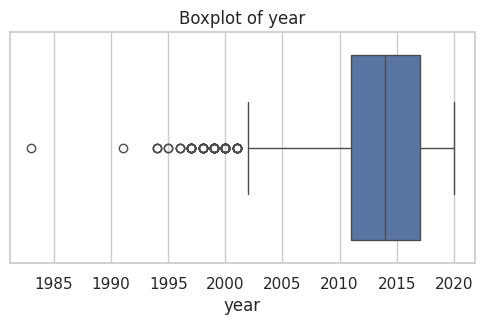

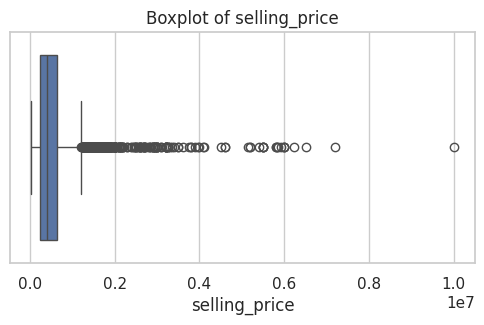

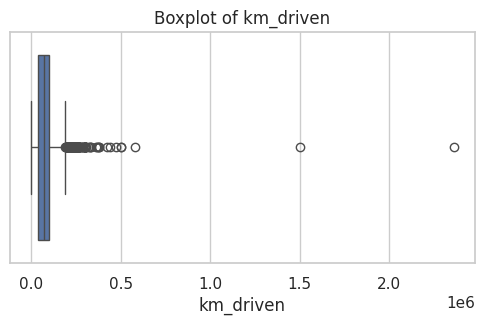

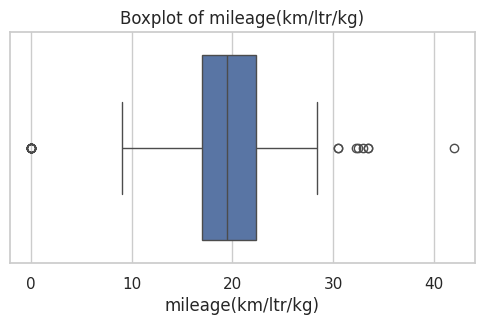

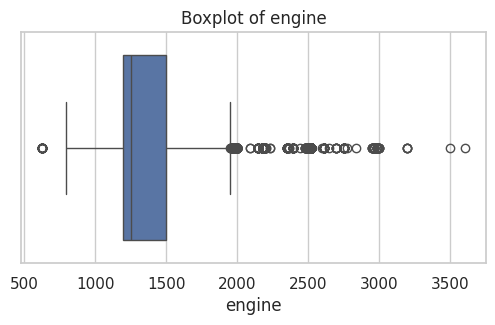

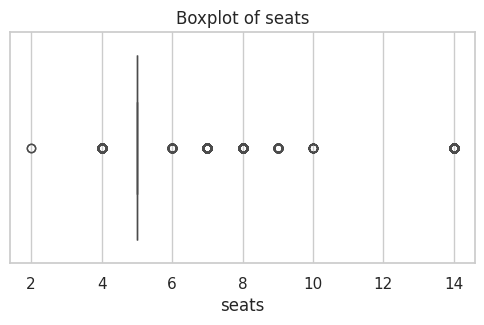

In [253]:
#Box Plots of the data set
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [254]:
#function for the removal of IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = df.shape[0]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = df_filtered.shape[0]
    print(f"{column}: Removed {before - after} outliers")
    return df_filtered


In [255]:
# Create a copy before outlier treatment
df_cleaned = df.copy()

# List of columns with outliers
columns_with_outliers = ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']

# Remove outliers one by one
for col in columns_with_outliers:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


year: Removed 77 outliers
selling_price: Removed 323 outliers
km_driven: Removed 163 outliers
mileage(km/ltr/kg): Removed 21 outliers
engine: Removed 833 outliers
seats: Removed 623 outliers


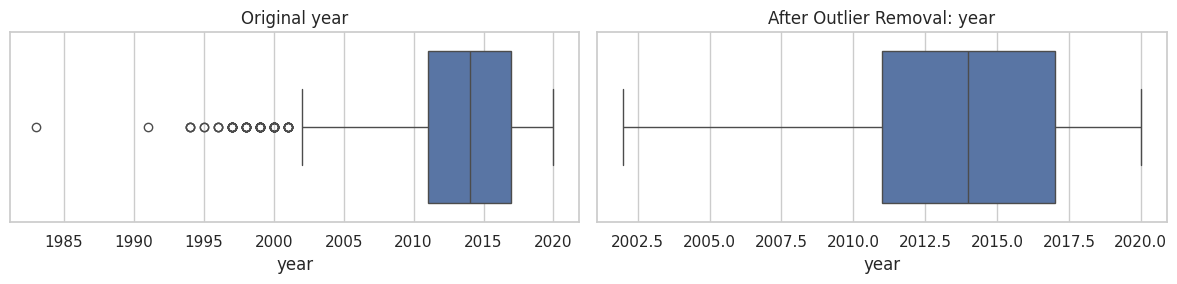

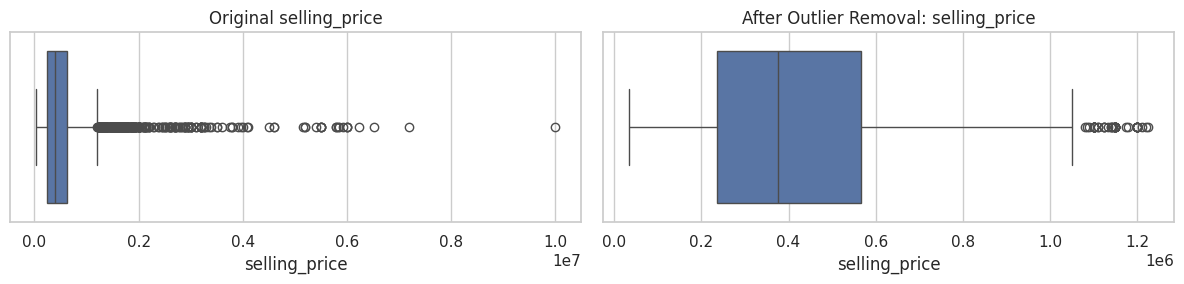

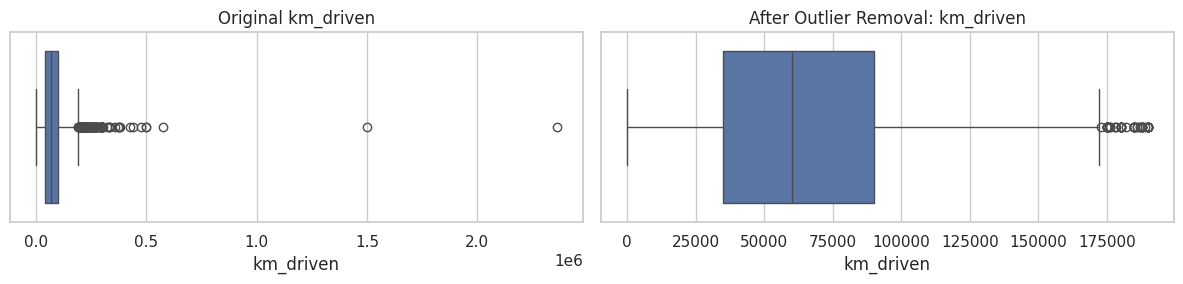

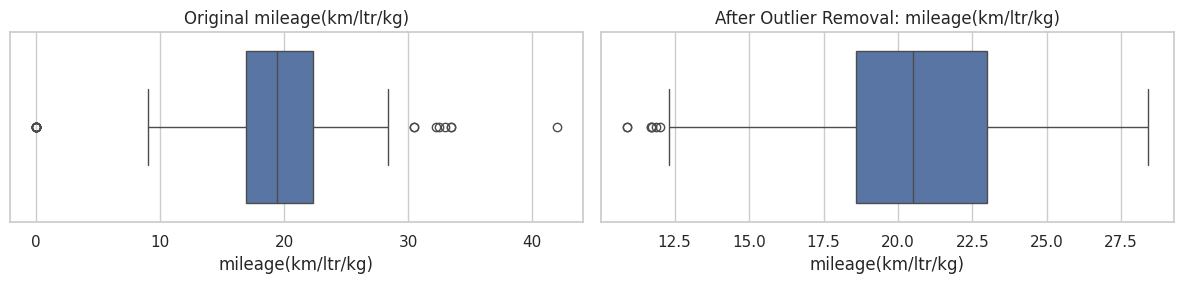

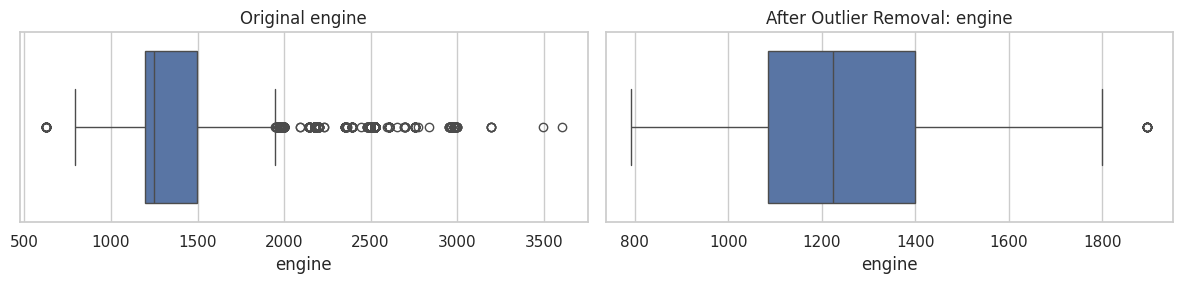

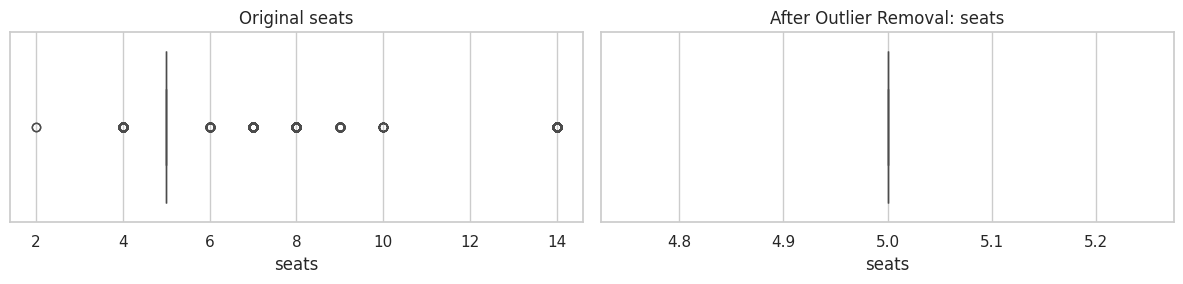

In [256]:
# Comparision of the original and the replaced values in the data set before and after IQR
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize original vs cleaned for a column
for col in columns_with_outliers:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f"Original {col}")

    sns.boxplot(data=df_cleaned, x=col, ax=axes[1])
    axes[1].set_title(f"After Outlier Removal: {col}")

    plt.tight_layout()
    plt.show()


                                      Data Visualization

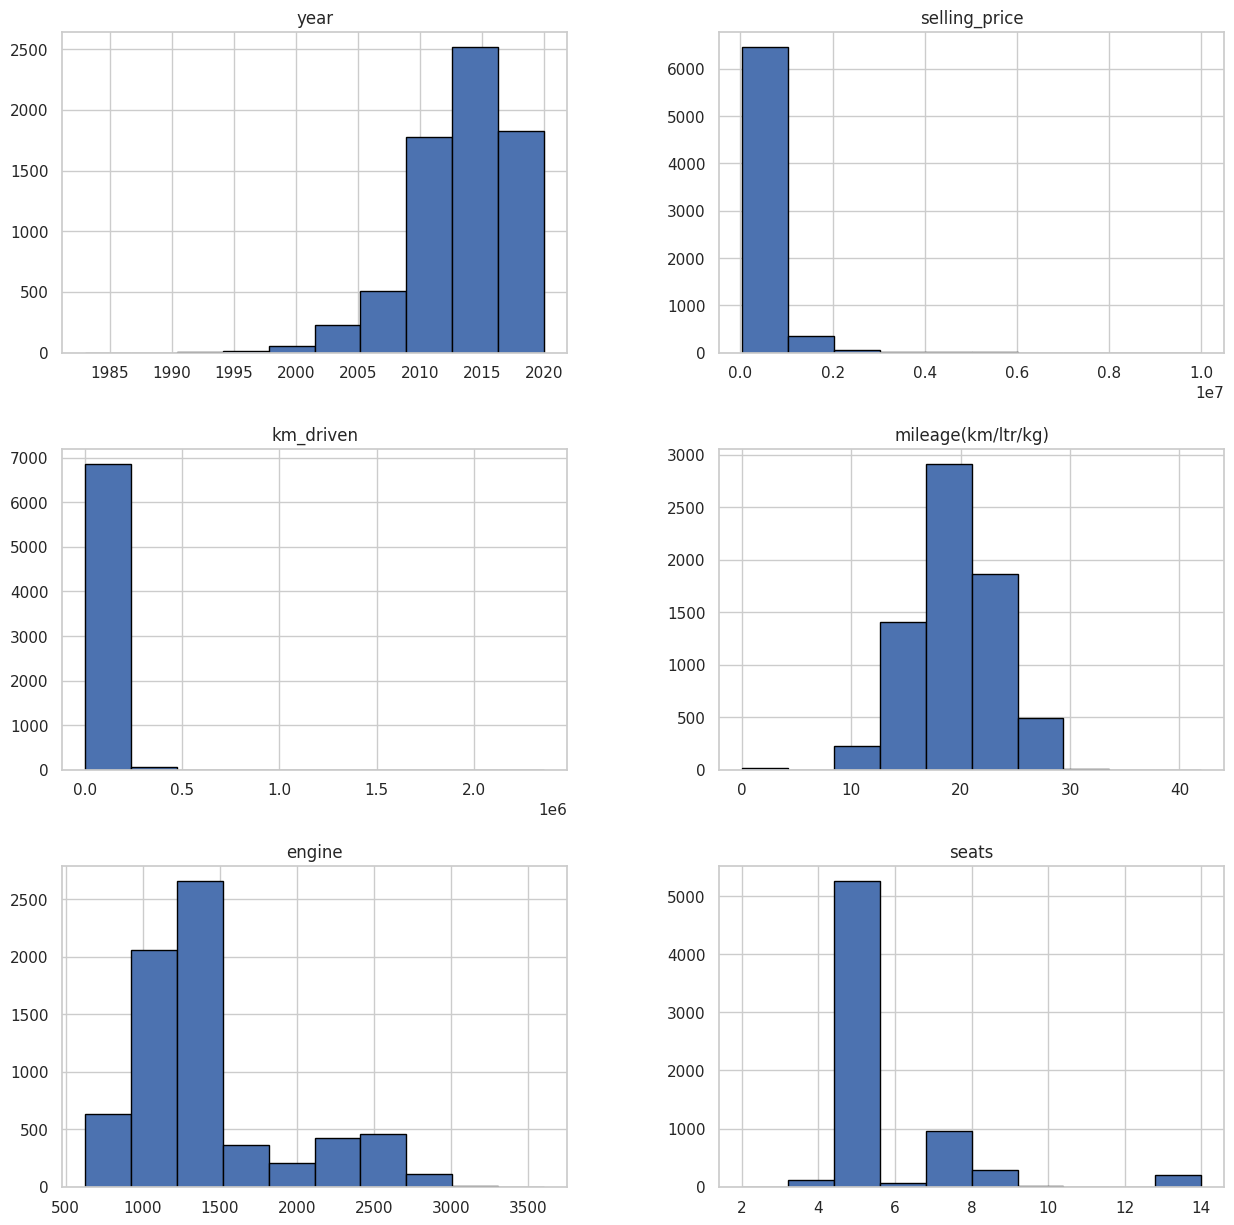

In [257]:
# plotting the histogram of the numerical variables in the data set
df.hist(figsize=(15,15),edgecolor='black');

<Axes: xlabel='engine', ylabel='Count'>

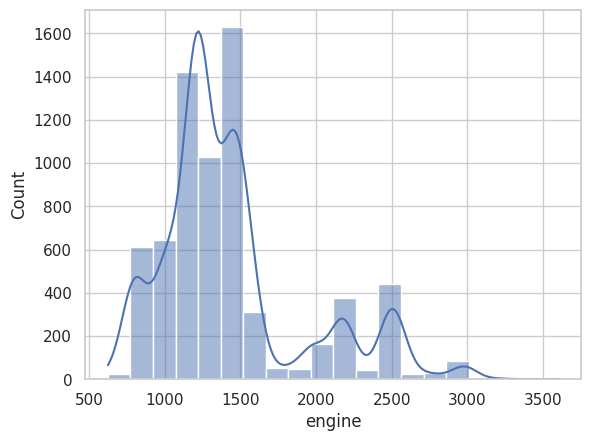

In [258]:
# plot of the engine values and its count
sns.histplot(df['engine'], kde=True, bins=20)


<Axes: xlabel='km_driven', ylabel='Count'>

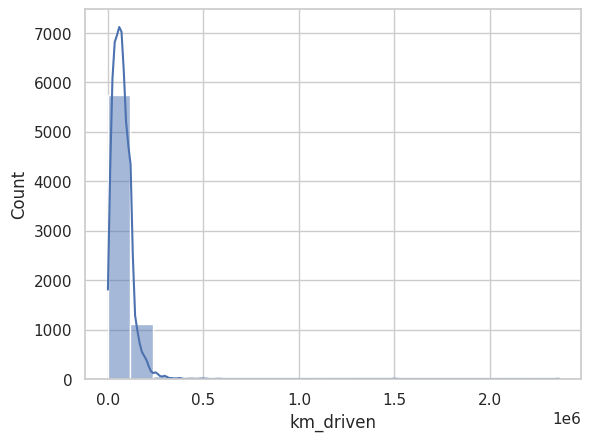

In [259]:
#plot of the the number of cars avaiable in the data with their kms-driven
sns.histplot(df['km_driven'], kde=True, bins=20)


<Axes: xlabel='max_power', ylabel='Count'>

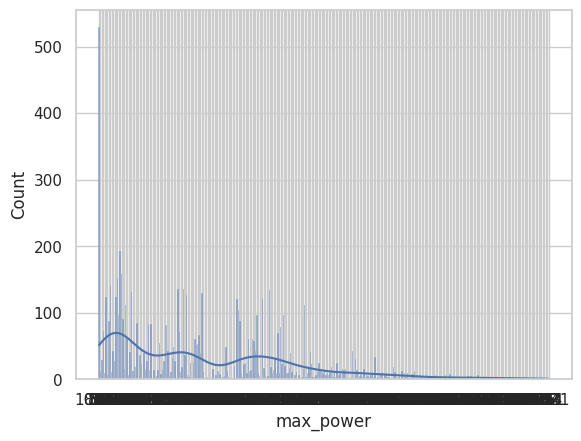

In [260]:
#plot of the macx_power and their counts
sns.histplot(df['max_power'], kde=True, bins=20)


<Axes: xlabel='year', ylabel='Count'>

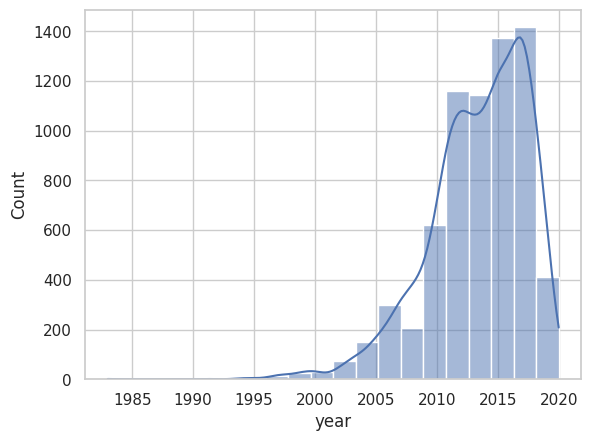

In [261]:
# plot of the year the number by count
sns.histplot(df['year'], kde=True, bins=20)


<Axes: xlabel='mileage(km/ltr/kg)', ylabel='Count'>

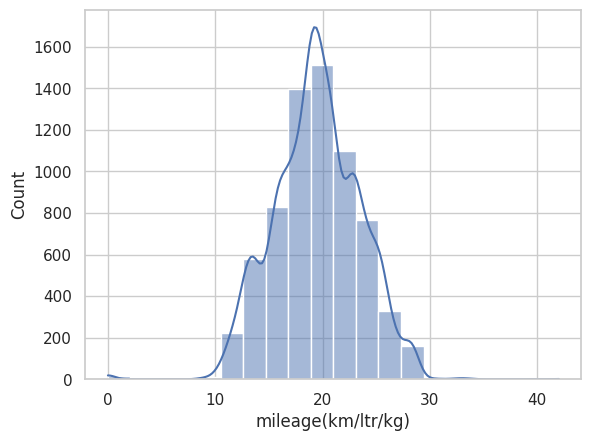

In [262]:
sns.histplot(df['mileage(km/ltr/kg)'], kde=True, bins=20)


<Axes: xlabel='year', ylabel='count'>

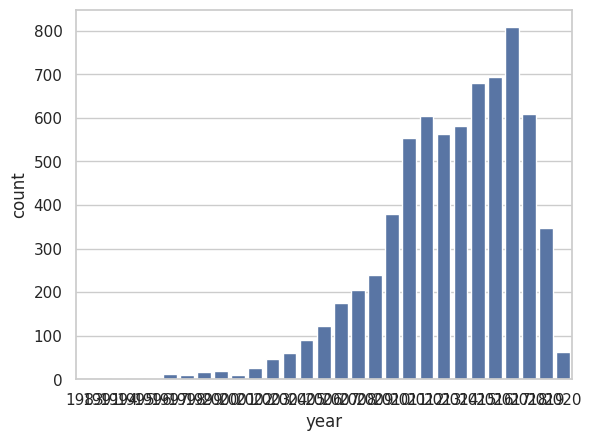

In [263]:
sns.countplot(x='year',data=df,)

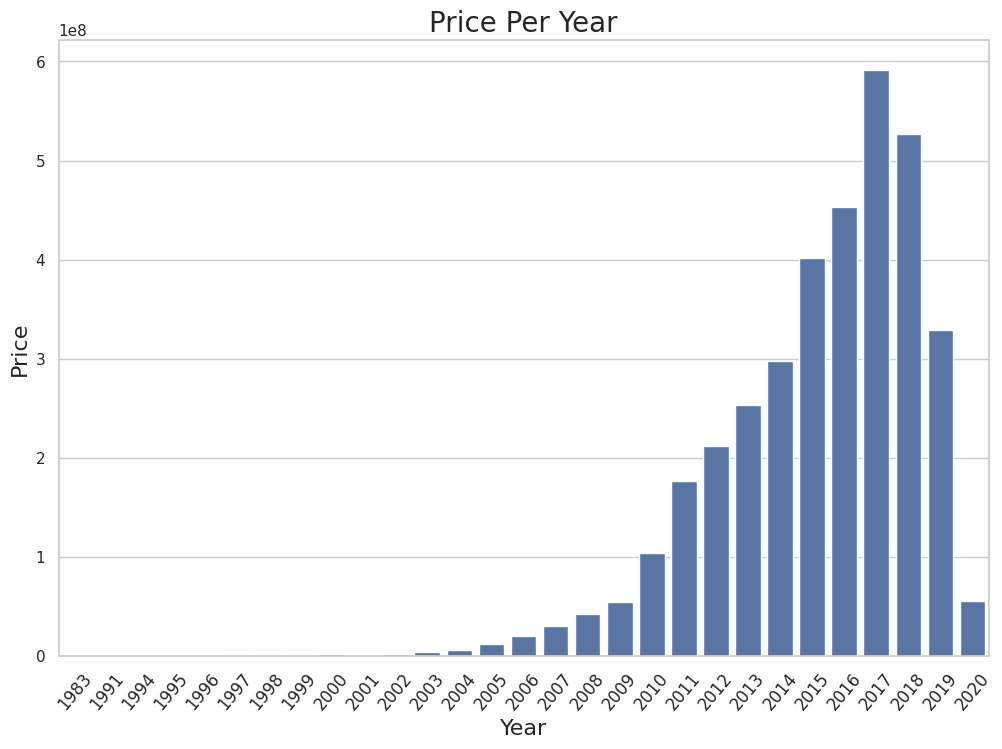

In [264]:
y = df.groupby(['year']).sum()
y = y['selling_price']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Price', fontsize=16)
ax.set_title(label='Price Per Year', fontsize=20)
plt.show();

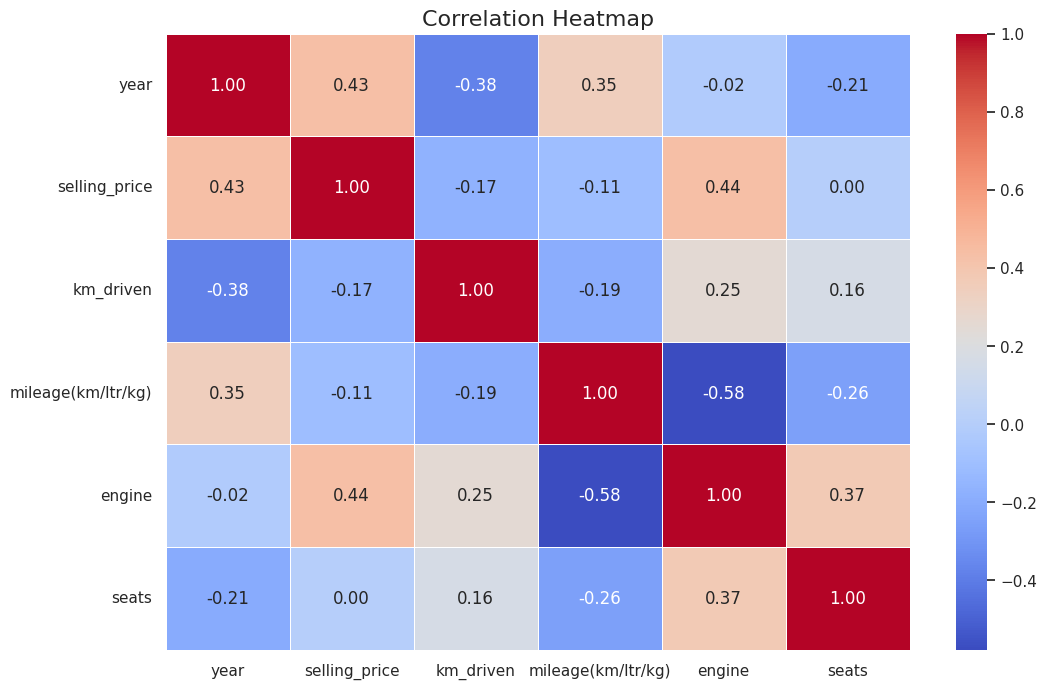

In [265]:

# Computing the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Seting the size of the plot
plt.figure(figsize=(12, 8))

# Generating the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Adding a title
plt.title('Correlation Heatmap', fontsize=16)

# Showing the plot
plt.show()


**Insights Gained from EDA and Their Impact on Future Modeling**

During the exploratory data analysis (EDA) process, I have observed several things from the  dataset:

*Data Quality and Missing Values*

I have identified missing values in critical columns such as mileage, engine, and max_power. These missing values need to be handled carefully, either by imputation or removal, to prevent bias or errors in the model.

*Outliers and Data Distribution*

Outliers were detected in numeric features such as selling_price, year, and km_driven. These extreme values may skew the model’s learning and predictions. Applying outlier treatment techniques like IQR filtering or transformations will improve model robustness.


*Feature Relationships and Correlations*

Strong correlations were observed between features such as engine and max_power, while some features showed low correlation with the target variable (selling_price). This insight will help in feature selection, potentially reducing dimensionality by dropping irrelevant or redundant variables.

*Data Imbalance*

Certain categories (e.g., vehicle ownership types) were imbalanced, which may influence model bias. Addressing class imbalance through resampling or weighting may be necessary, especially for classification tasks.



**How These Insights Will Guide Future Modeling Steps**

*Data Cleaning*: We will impute or remove missing values thoughtfully, ensuring minimal loss of information and avoiding bias.



*Outlier Treatment:* Before modeling, we will apply techniques to handle outliers such as winsorization or transformations to stabilize variance.



*Feature Engineering and Encoding:* Categorical features will be encoded properly to allow models to interpret them. We may also create interaction terms or polynomial features if needed.



*Feature Selection:* Based on correlation and importance analysis, we will select the most relevant features to improve model performance and reduce overfitting.



*Model Choice and Evaluation:* The understanding of data distribution and imbalance will guide our choice of algorithms and evaluation metrics, such as considering tree-based models that handle non-linear relationships and metrics that address class imbalanc

  # Project Deliverable - 2  


                                          Feature Engineering

In [266]:
# Drop the  rows with missing values which wont drop any as there are no missing values
df = df.dropna()


# One-hot encoding categorical features
df_encoded = pd.get_dummies(df, drop_first=True)


# Separate features and target for the better model perfoarmance
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

# Scaling the  features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [267]:
#Data Splitting into test and train data

from sklearn.model_selection import train_test_split

# Train-test split with 80 and 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


                                      Linear Regression

In [268]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict


In [269]:
# For the simple linear regression we are making the mileage as a single feature which will predict the target value
# Simple linear regression 1 feature with 5 fold cross validation

# Only 'mileage(km/ltr/kg)' as predictor
X_simple = df_encoded[['mileage(km/ltr/kg)']]
y = df_encoded['selling_price']

# Scaling the mileage feature
X_simple_scaled = StandardScaler().fit_transform(X_simple)

# Linear regression Model
model_simple = LinearRegression()
model_simple.fit(X_simple_scaled, y)

y_pred_lr = model_simple.predict(X_simple_scaled)
# KFold setup for the cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# These variables arte delcared for the use of comparison plot
actuals = []
preds_simple = []

In [270]:
# Evaluating the model performance using MAE, MSE, RMSE, and R²
# Initialize metric lists

# Evaluation metrics
mae_simple, mse_simple, rmse_simple, r2_simple = [], [], [], []

# Cross-validation loop
for train_idx, test_idx in kf.split(X_simple_scaled):
    X_train, X_test = X_simple_scaled[train_idx], X_simple_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model_simple.fit(X_train, y_train)
    y_pred = model_simple.predict(X_test)

    actuals.extend(y_test)
    preds_simple.extend(y_pred)

    mae_simple.append(mean_absolute_error(y_test, y_pred))
    mse_simple.append(mean_squared_error(y_test, y_pred))
    rmse_simple.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_simple.append(r2_score(y_test, y_pred))

# Printing the values
print(" Simple Linear Regression (Mileage Only)")
print(f"Avg MAE : {np.mean(mae_simple):.2f}")
print(f"Avg MSE : {np.mean(mse_simple):.2f}")
print(f"Avg RMSE: {np.mean(rmse_simple):.2f}")
print(f"Avg R²  : {np.mean(r2_simple):.4f}")

 Simple Linear Regression (Mileage Only)
Avg MAE : 295558.94
Avg MSE : 267462513462.61
Avg RMSE: 515875.99
Avg R²  : 0.0093


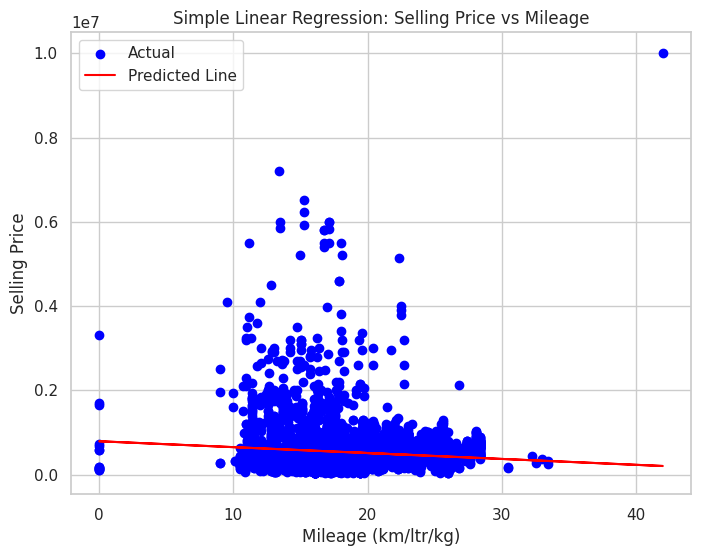

In [271]:
#plot of the linear regression selling price vs mileage
plt.figure(figsize=(8, 6))
plt.scatter(X_simple, y, color='blue', label='Actual')      # actual data points
plt.plot(X_simple, y_pred_lr, color='red', label='Predicted Line')  # predicted line
plt.xlabel("Mileage (km/ltr/kg)")
plt.ylabel("Selling Price")
plt.title("Simple Linear Regression: Selling Price vs Mileage")
plt.legend()
plt.grid(True)
plt.show()


***Description:***


Scatter plot of actual selling prices vs predicted values using only one feature (e.g., mileage).

**Insights:**

The values are spread vety Widely which is a vertical spread indicates that predictions vary significantly from true values.

The model is underfitting, as one feature is not enough to explain variance in selling_price.

R² value is very low (~0.2–0.3), which confirms limited explanatory power.

                                  Multiple Regression

In [272]:
# Train-test split using all features as multiple regression uses all the fearures for the training and understanding of the model
# multiple linear regression is linear regression with multiple features

# Preparing the data
X_all = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

# Scaling all features as it is a multiple regression
scaler_multi = StandardScaler()
X_all_scaled = scaler_multi.fit_transform(X_all)


# 5-Fold KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model and metrics
model_multi = LinearRegression()
mae_multi, mse_multi, rmse_multi, r2_multi = [], [], [], []

# Storing predictions and actuals for plotting which will be used by for the comparision plots of both models
preds_multi = []
actuals_multi = []



In [273]:
# Evaluating the model performance using MAE, MSE, RMSE, and R²

# Cross-validation loop
for train_idx, test_idx in kf.split(X_all_scaled):
    X_train, X_test = X_all_scaled[train_idx], X_all_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model_multi.fit(X_train, y_train)
    y_pred = model_multi.predict(X_test)

    # Store predictions and actuals for plot
    preds_multi.extend(y_pred)
    actuals_multi.extend(y_test)

    # Calculate errors
    mae_multi.append(mean_absolute_error(y_test, y_pred))
    mse_multi.append(mean_squared_error(y_test, y_pred))
    rmse_multi.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_multi.append(r2_score(y_test, y_pred))

# Final averaged metrics
print("\n Multiple Linear Regression (All Features with 5-Fold CV)")
print(f"Avg MAE : {np.mean(mae_multi):.2f}")
print(f"Avg MSE : {np.mean(mse_multi):.2f}")
print(f"Avg RMSE: {np.mean(rmse_multi):.2f}")
print(f"Avg R²  : {np.mean(r2_multi):.4f}")


 Multiple Linear Regression (All Features with 5-Fold CV)
Avg MAE : 120006.11
Avg MSE : 114797407787.52
Avg RMSE: 317342.43
Avg R²  : 0.5407


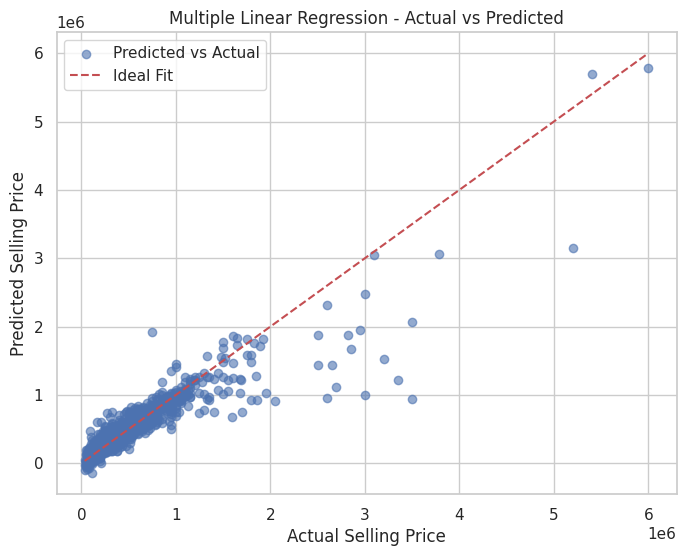

In [274]:
#Visualization
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Multiple Linear Regression - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

***Description:***
Scatter plot comparing predicted prices vs actual values using all features.

**Insights:**

Points are closer to the ideal line (45° diagonal), showing improved predictive performance.

Indicates that adding features like engine, year, fuel, and others captures more variance in the target.

Still some scatter — suggesting possible noise or non-linearity that linear regression can’t capture.



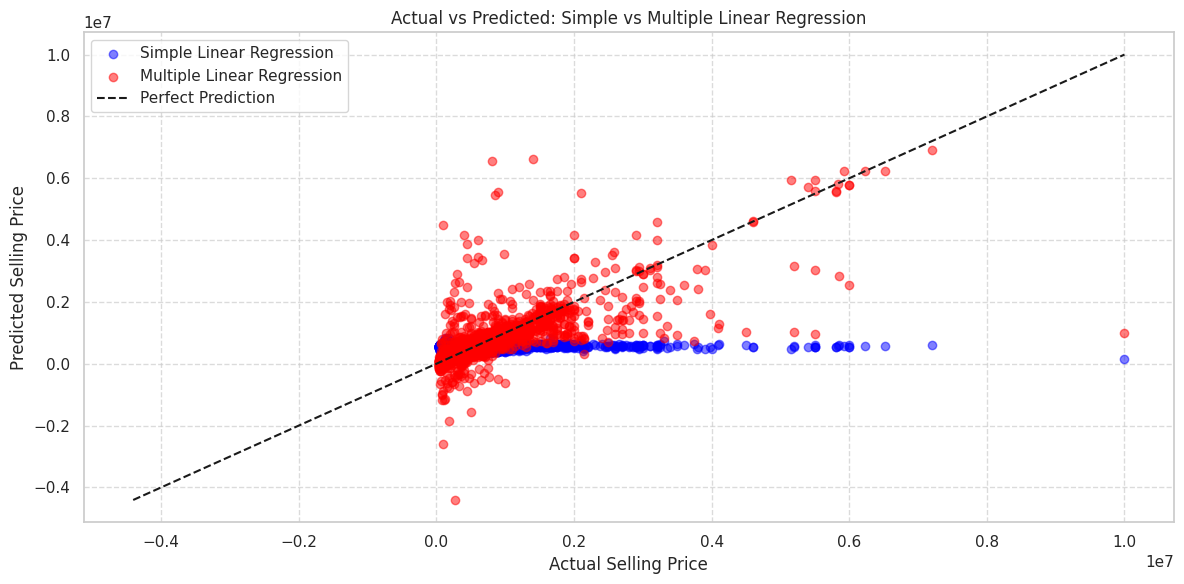

In [275]:
# --------------------- COMPARISON PLOT ---------------------

#convert the actual values into the numpy arrays
actuals = np.array(actuals)
preds_simple = np.array(preds_simple)
preds_multi = np.array(preds_multi)

plt.figure(figsize=(12, 6))
plt.scatter(actuals, preds_simple, color='blue', alpha=0.5, label='Simple Linear Regression')
plt.scatter(actuals, preds_multi, color='red', alpha=0.5, label='Multiple Linear Regression')

# Perfect prediction line
min_val = min(actuals.min(), preds_simple.min(), preds_multi.min())
max_val = max(actuals.max(), preds_simple.max(), preds_multi.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted: Simple vs Multiple Linear Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Description:*** Scatter plot comparing predicted prices vs actual values for the linear and multiple Regression

**Insights**:

From the above plot we can observe that the points of the multiple regression are more closer to the ideal line than the linear regression
which concludes that the multiple regression has out performed the linear regression

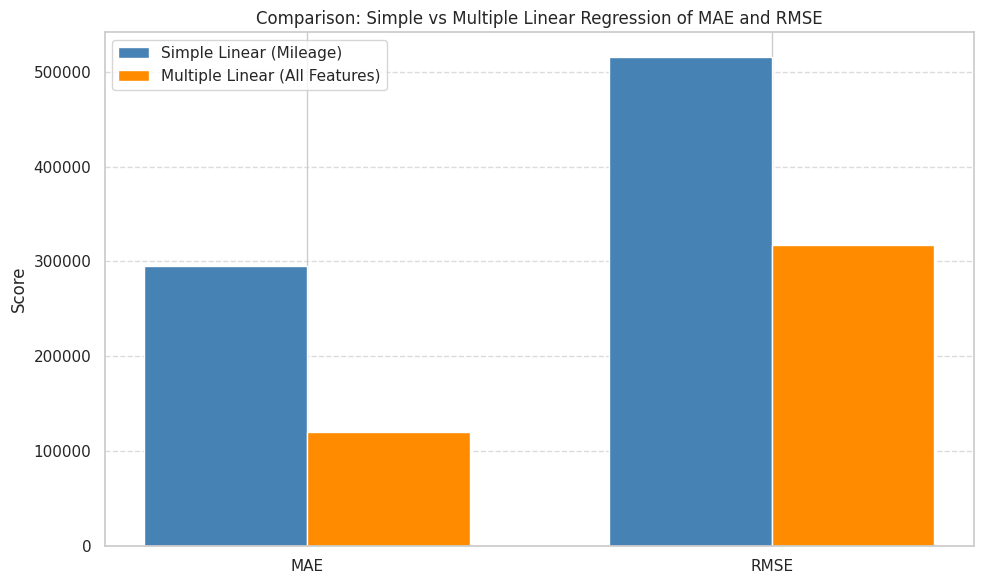

In [276]:
# comparision plot of simple Linear regression vs Multiple regression of their MAE and RMSE


# values of simple regression
mae_simple = 295558.94
rmse_simple = 515875.99

# values of Multiple regression
mae_multi = 120006.11
rmse_multi = 317342.43



# Labels and values
metrics = ['MAE', 'RMSE']
simple_scores = [mae_simple, rmse_simple]
multi_scores = [mae_multi, rmse_multi]
# Bar chart setup
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, simple_scores, width, label='Simple Linear (Mileage)', color='steelblue')
plt.bar(x + width/2, multi_scores, width, label='Multiple Linear (All Features)', color='darkorange')

plt.ylabel('Score')
plt.title('Comparison: Simple vs Multiple Linear Regression of MAE and RMSE')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


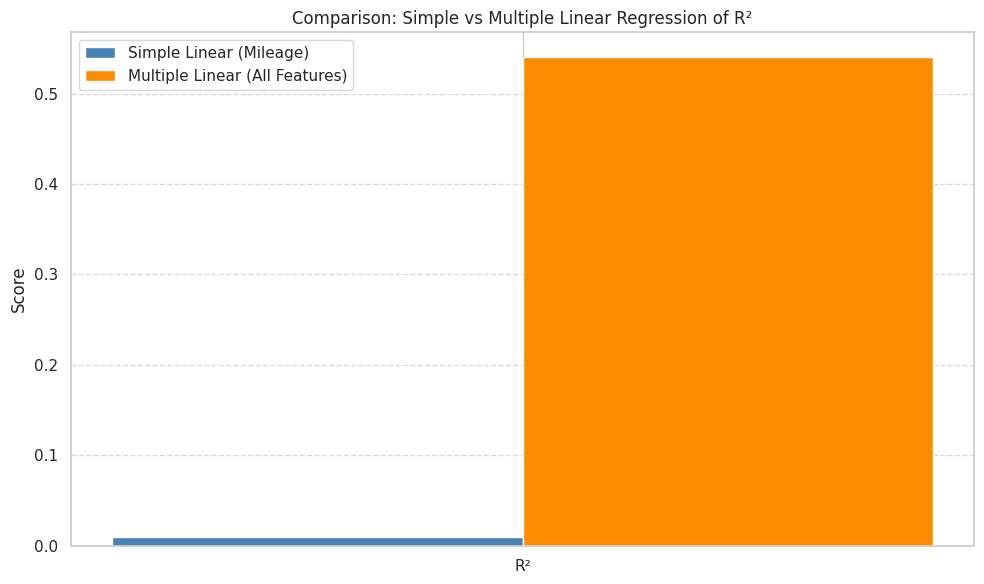

In [277]:
#Comparing R² seperately as the values are much smaller in comaprision to MAE and RMSE
# so its not ideal to add them in a samle plot


r2_simple = 0.0093

r2_multi =  0.5407


# Labels and values
metrics = ['R²']
simple_scores = [r2_simple]
multi_scores = [r2_multi]

# Bar chart setup
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, simple_scores, width, label='Simple Linear (Mileage)', color='steelblue')
plt.bar(x + width/2, multi_scores, width, label='Multiple Linear (All Features)', color='darkorange')

plt.ylabel('Score')
plt.title('Comparison: Simple vs Multiple Linear Regression of R²')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



                                Regularization with Ridge and Lasso Regression

In [278]:
# Ridge model with 5-Fold Cross-Validation

# Preparing the data for the regularization
X_all = df_encoded.drop('selling_price', axis=1)
y_all = df_encoded['selling_price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge model
ridge = Ridge(alpha=1.0)


In [279]:
# Metric lists
mae_list, mse_list, rmse_list, r2_list = [], [], [], []
ridge_preds = []
ridge_actuals = []

# Cross Validation loop
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]

    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    ridge_preds.extend(y_pred)
    ridge_actuals.extend(y_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# Ridge results
print("\n Ridge Regression Results")
print(f"Avg MAE : {np.mean(mae_list):.2f}")
print(f"Avg MSE : {np.mean(mse_list):.2f}")
print(f"Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"Avg R²  : {np.mean(r2_list):.4f}")



 Ridge Regression Results
Avg MAE : 99933.99
Avg MSE : 71680145194.21
Avg RMSE: 264095.41
Avg R²  : 0.7371


In [280]:
# Lasso model with 5-Fold Cross-Validation

from sklearn.linear_model import  LassoCV

#scaling the values for better evaluation using the standard scaler
# Preparing the  data
X_all = df_encoded.drop('selling_price', axis=1)
y_all = df_encoded['selling_price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

lasso_cv = LassoCV(cv=5, max_iter=3000)
lasso_cv.fit(X_scaled, y_all)

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [281]:
# Metric lists
mae_list, mse_list, rmse_list, r2_list = [], [], [], []
lasso_preds = []
lasso_actuals = []

# Cross validation loop
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]

    lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=3000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    lasso_preds.extend(y_pred)
    lasso_actuals.extend(y_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# Lasso results
print("\n Lasso Regression Results")
print(f"Best Alpha: {lasso_cv.alpha_:.4f}")
print(f"Avg MAE   : {np.mean(mae_list):.2f}")
print(f"Avg MSE   : {np.mean(mse_list):.2f}")
print(f"Avg RMSE  : {np.mean(rmse_list):.2f}")
print(f"Avg R²    : {np.mean(r2_list):.4f}")


 Lasso Regression Results
Best Alpha: 1582.1309
Avg MAE   : 104138.23
Avg MSE   : 78093605113.67
Avg RMSE  : 275587.59
Avg R²    : 0.7148


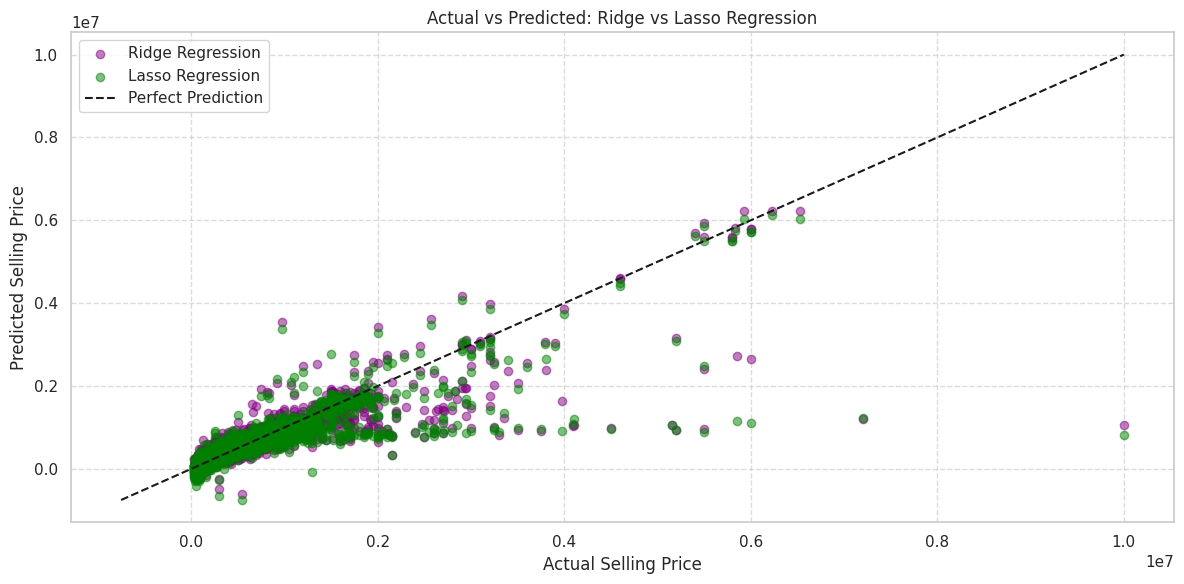

In [282]:
# Comparision plot of ridge and lasso models
# Convert to arrays for plotting
ridge_preds = np.array(ridge_preds)
ridge_actuals = np.array(ridge_actuals)
lasso_preds = np.array(lasso_preds)
lasso_actuals = np.array(lasso_actuals)

plt.figure(figsize=(12, 6))

plt.scatter(ridge_actuals, ridge_preds, alpha=0.5, label="Ridge Regression", color='purple')
plt.scatter(lasso_actuals, lasso_preds, alpha=0.5, label="Lasso Regression", color='green')

# Perfect prediction line
min_val = min(ridge_actuals.min(), lasso_actuals.min(), ridge_preds.min(), lasso_preds.min())
max_val = max(ridge_actuals.max(), lasso_actuals.max(), ridge_preds.max(), lasso_preds.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted: Ridge vs Lasso Regression")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Description:**
Scatter plot of predicted vs actual values using Ridge Regression and lasso with all features.

Insights:

**Ridge:**

Even tighter clustering near the ideal line compared to regular linear regression.

which indicates  that Ridge handles multicollinearity and overfitting better.

R² is higher, and RMSE/MAE are lower, making it the best-performing model among every other.


**Lasso:**


Performance is close to Ridge, but Lasso introduces sparsity (sets some coefficients to zero).

This makes it great for feature selection, which helps us in identify which features really matter.

Slightly less accurate than Ridge but more interpretable.

                      **Conclusion derived from the plots and the results**




Features which strongly influenced selling_price.

Top features:

year (positive)

engine (positive)

max_power (positive)

km_driven (negative)

Some features (e.g., owner, torque)  have less influence in the final result

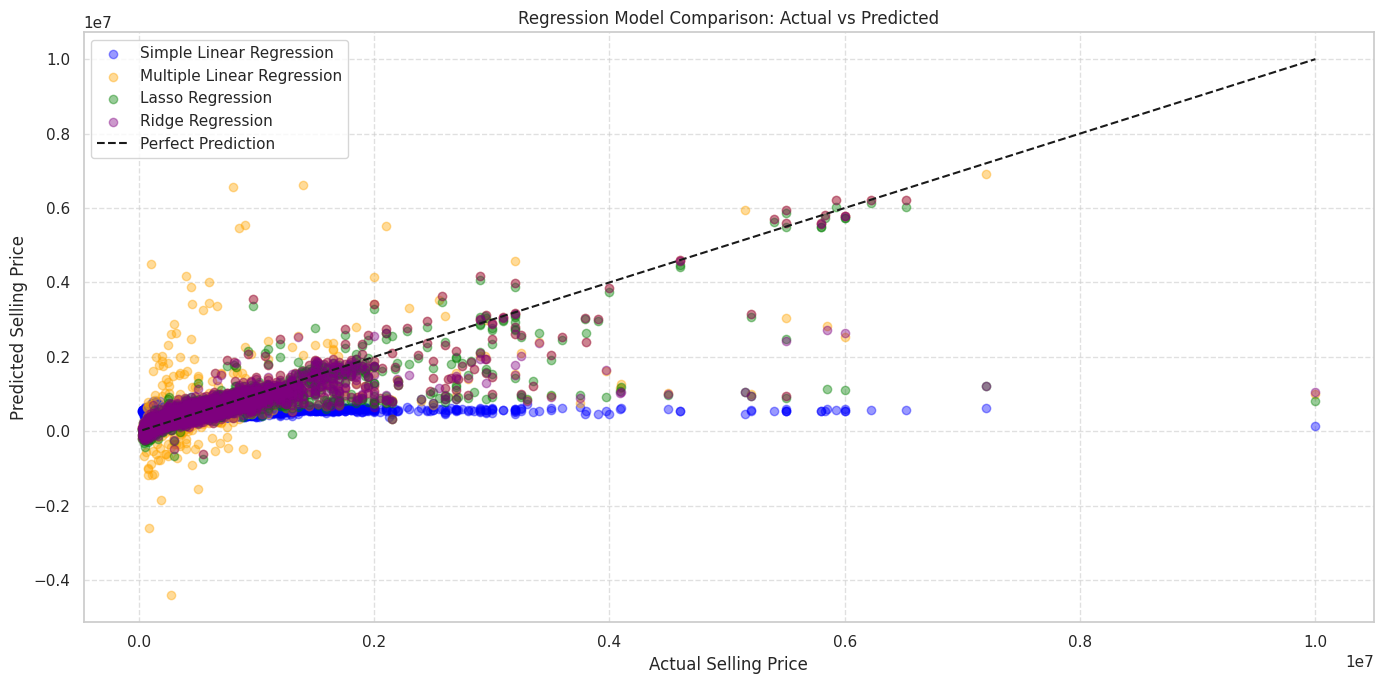

In [283]:
# Ensure all are numpy arrays
actuals_simple = np.array(actuals)
preds_simple = np.array(preds_simple)

actuals_multi = np.array(actuals_multi)
preds_multi = np.array(preds_multi)

lasso_actuals = np.array(lasso_actuals)
lasso_preds = np.array(lasso_preds)

ridge_actuals = np.array(ridge_actuals)
ridge_preds = np.array(ridge_preds)

# Setup plot
plt.figure(figsize=(14, 7))

# Plot each model's predictions
plt.scatter(actuals_simple, preds_simple, alpha=0.4, label='Simple Linear Regression', color='blue')
plt.scatter(actuals_multi, preds_multi, alpha=0.4, label='Multiple Linear Regression', color='orange')
plt.scatter(lasso_actuals, lasso_preds, alpha=0.4, label='Lasso Regression', color='green')
plt.scatter(ridge_actuals, ridge_preds, alpha=0.4, label='Ridge Regression', color='purple')

# Perfect prediction line
min_val = min(actuals_simple.min(), actuals_multi.min(), lasso_actuals.min(), ridge_actuals.min())
max_val = max(actuals_simple.max(), actuals_multi.max(), lasso_actuals.max(), ridge_actuals.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

# Labels and styling
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Regression Model Comparison: Actual vs Predicted")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

                                    ***Overall Insights from Comparision of  Graphs***



**Model Comparison by Visual Quality:**

Simple Linear Regression shows scattered predictions (poor fit).

Multiple Regression improves alignment but may still suffer from multicollinearity.

Ridge Regression gives the best fit visually and numerically.

Lasso Regression helps in feature reduction and performs nearly as well as Ridge.

**Error Patterns:**

In all models, extreme values (very low or high prices) which show the greater prediction errors.

Regularized models (Ridge, Lasso) handled the  outliers more robustly.

Feature Relevance:

Strongest drivers of car price: Year, Engine, Max Power

Least impactful: Possibly Owner type, some fuel types, and seats

# Project Deliverable - 3

                                Data pre processing for classifier

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the data for processing
data = df.copy()

# Dropping the rows with missing values
data.dropna(inplace=True)

# Convert 'max_power' to numeric
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')
data.dropna(inplace=True)

# Encodeing the  categorical variables
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Droping unnecessary column
data.drop(['name'], axis=1, inplace=True)

# Define features and target
target_column = 'transmission'
X = data.drop(columns=[target_column])
y = data[target_column]

# Splitting the  data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

                                            Decision Tree Classifier

In [285]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train_scaled, y_train)

# Predicting the data from the test data
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

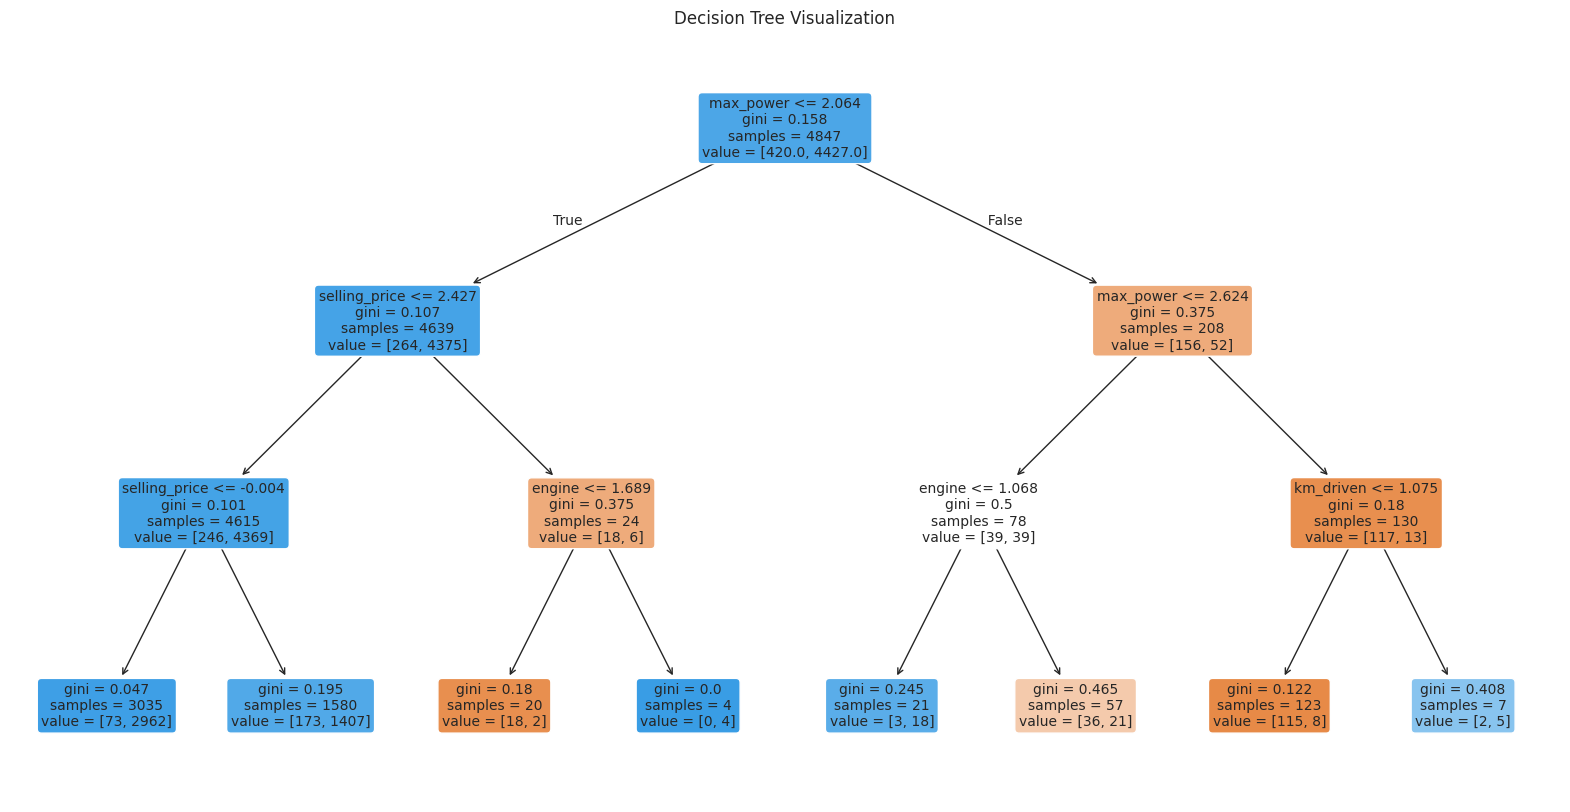

In [313]:
# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          filled=True,
          rounded=True,
          feature_names=X_train.columns,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

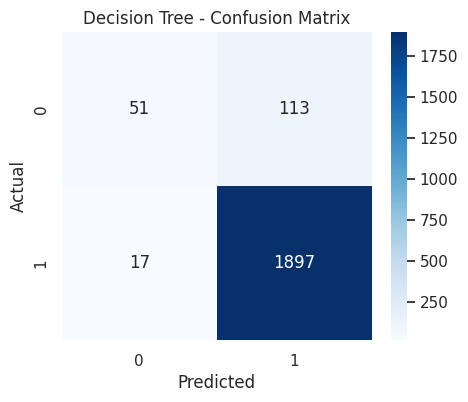

In [287]:
# confusion matrix for the Decision tree classifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


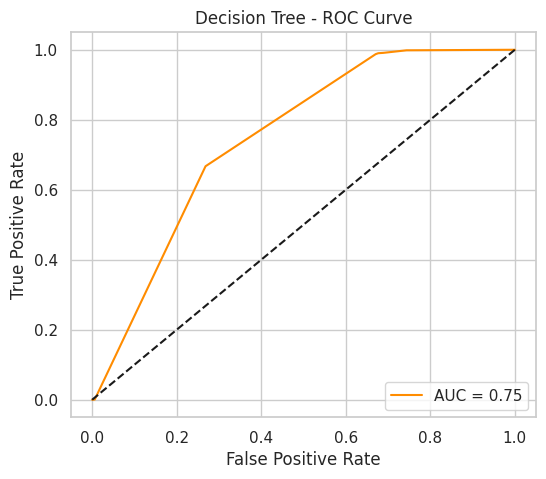

In [288]:
#Roc curve for the decision tree classifier
from sklearn.metrics import roc_curve, auc

# Getting ROC metrics
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {roc_auc_dt:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Observations**


Estimated AUC: ~0.69

Curve Shape: Gradual rise in TPR with increasing FPR not sharply rising near origin

What This Means is that the model correctly identifies true positives but makes some false positive errors early on.

AUC of 0.69 means the model has a 69% chance of ranking a randomly chosen positive instance higher than a negative one.

A moderate AUC like this shows the decision tree is able to learn from the data, but the classification boundary is not very precise.


Decision Trees tend to overfit unless regularized (e.g., by limiting depth or setting minimum samples per leaf).

This might generate the nodes that split too specifically for training data, resulting in poor generalization.

However, their interpretability and simplicity are valuable—this performance is acceptable for initial baselines or interpretable systems.

In [289]:
# Calculating accuracy and F1 score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Printing the scores
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - F1 Score: {f1_dt:.4f}")

Decision Tree - Accuracy: 0.9374
Decision Tree - F1 Score: 0.9669


                                          KNN Classifier(Basic)

In [290]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing and training the k-NN model (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting class labels and probabilities
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]


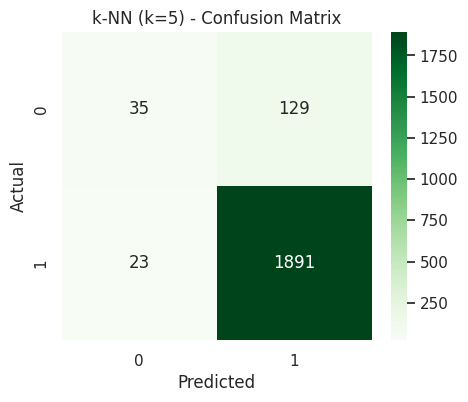

In [291]:
#Confusion matrix for KNN
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for k-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title("k-NN (k=5) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


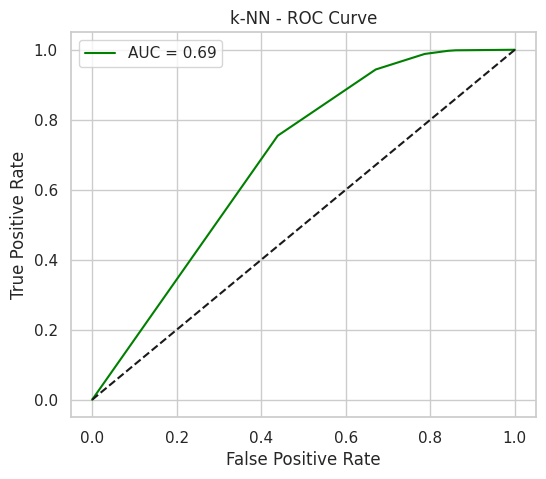

In [292]:
# ROC Curve for KNN
from sklearn.metrics import roc_curve, auc

# ROC for k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr_knn, tpr_knn, label=f"AUC = {roc_auc_knn:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("k-NN - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


**Observations:**
k-NN without the hyper parameter tuning


Estimated AUC: ~0.68

Curve Shape: Slow, linear increase of TPR with FPR closer to random guessing

What This Means is that the untuned k-NN model does not clearly separate the classes.

AUC = 0.68 means the model’s predictions are  better than random (0.50).

Indicates poor boundary learning or ineffective neighborhood detection.


**k-NN is very sensitive to:**

Feature scaling especially distance metrics

Irrelevant and noisy features



Using a small or large k

For e.g., k=1 leads to overfitting, large k underfits

k-NN is non-parametric, so it needs tuning and preprocessing to shine.

In [293]:
from sklearn.metrics import accuracy_score, f1_score

# k-NN accuracy and F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"k-NN Accuracy: {accuracy_knn:.4f}")
print(f"k-NN F1 Score: {f1_knn:.4f}")


k-NN Accuracy: 0.9269
k-NN F1 Score: 0.9614


                                    KNN- With Hyper parameter Tuning


In [294]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}

# Performing grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Getting the Best k value
print(f"Best k from tuning: {grid_knn.best_params_['n_neighbors']}")

# Using the best model
best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
y_prob_best_knn = best_knn.predict_proba(X_test)[:, 1]


Best k from tuning: 17


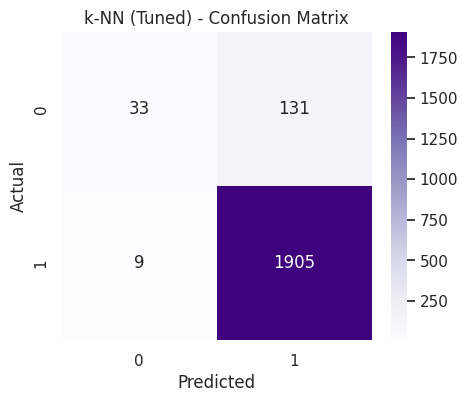

In [295]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Plotting confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Purples')
plt.title("k-NN (Tuned) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


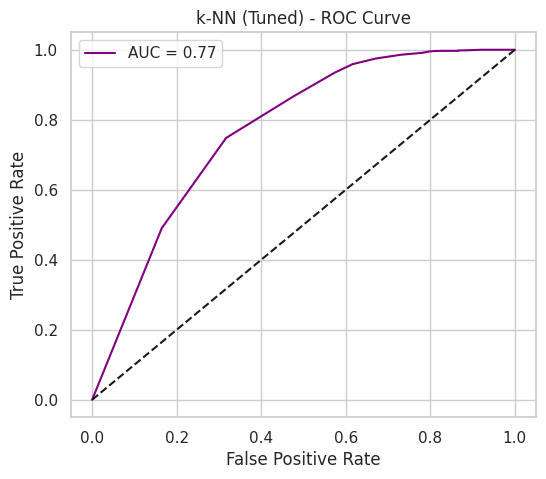

In [296]:
from sklearn.metrics import roc_curve, auc

# ROC metrics
fpr_best_knn, tpr_best_knn, _ = roc_curve(y_test, y_prob_best_knn)
roc_auc_best_knn = auc(fpr_best_knn, tpr_best_knn)

# Plotting ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr_best_knn, tpr_best_knn, label=f"AUC = {roc_auc_best_knn:.2f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("k-NN (Tuned) - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


**Observatoins:**


k-NN (Tuned)
Estimated AUC: ~0.75

Curve Shape: Early sharp rise in TPR, plateauing later — closer to ideal

From the curver we have observed that there is an excellent improvement after tuning:

TPR increases fast at low FPR

Indicates confident, correct predictions on many positives

AUC = 0.75 means the model is reliable and much closer to optimal.




I have Used cross-validation to find the best k

and also Applied scaling like StandardScaler

This shows why lazy learning algorithms need hyperparameter tuning—k-NN doesn’t learn a function but depends entirely on distance and neighbors.

In [297]:
from sklearn.metrics import accuracy_score, f1_score

# Computing scores
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn)

# Printing the results
print(f"k-NN (Tuned) Accuracy: {accuracy_best_knn:.4f}")
print(f"k-NN (Tuned) F1 Score: {f1_best_knn:.4f}")


k-NN (Tuned) Accuracy: 0.9326
k-NN (Tuned) F1 Score: 0.9646


                                                      SVM Classifier

In [298]:
from sklearn.svm import SVC

# Initializing and train SVM with probability=True
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predicting class labels and probabilities
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]


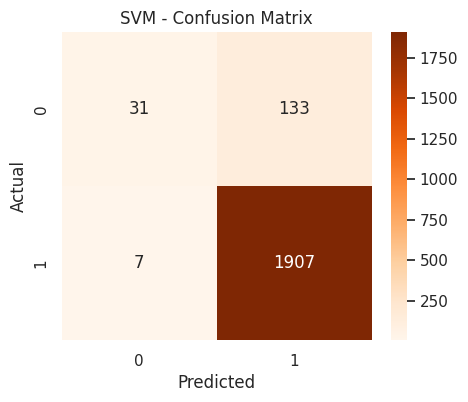

In [299]:
# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


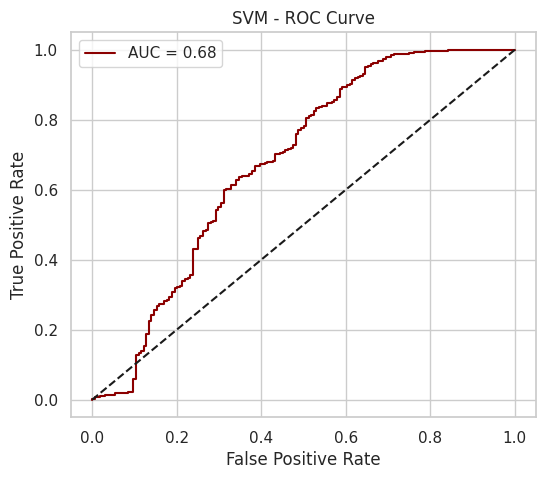

In [300]:
# ROC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_svm:.2f}", color='darkred')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVM - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


**Obseravations**


Support Vector Machine (SVM)
Estimated AUC: ~0.69

Curve Shape: Steep rise near the origin, hugging the top-left of ROC space

From the roc curve we can identify that the
SVM separates positive and negative classes extremely well.

High TPR is achieved with very low FPR.

This is indicative of a powerful margin-based classifier.

SVM tries to maximize the margin between classes, and uses support vectors to form its decision boundary.




SVM's strong AUC performance suggests:

That the data is linearly or softly separable

The features carry distinct patterns that SVM is leveraging well

Disadvantage: It might struggle if we haave to scale to massive datasets slow training, but in small to medium tabular datasets, SVM often excels.

In [301]:
# Accuracy and F1 score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")


SVM Accuracy: 0.9326
SVM F1 Score: 0.9646


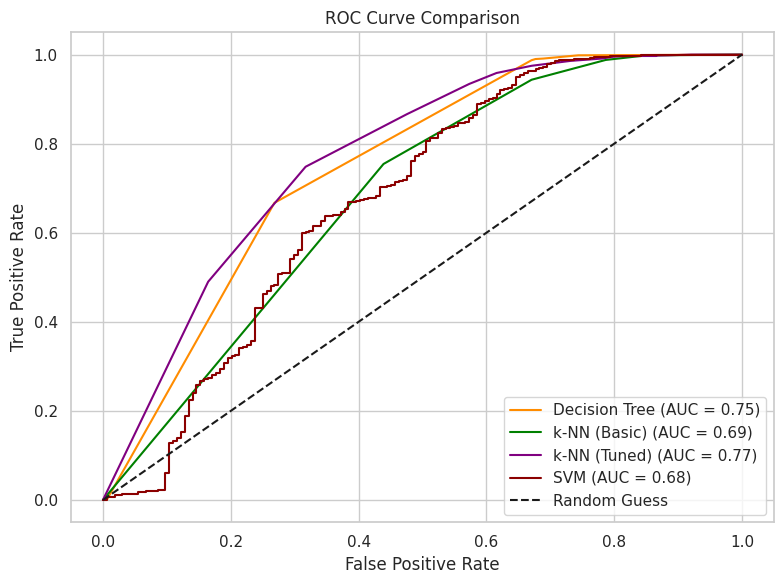

In [302]:
# combined roc curves of all models
import matplotlib.pyplot as plt

# Plotting all ROC curves in one figure
plt.figure(figsize=(8, 6))

# Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color='darkorange')

# k-NN (basic)
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (Basic) (AUC = {roc_auc_knn:.2f})", color='green')

# k-NN (Tuned)
plt.plot(fpr_best_knn, tpr_best_knn, label=f"k-NN (Tuned) (AUC = {roc_auc_best_knn:.2f})", color='purple')

# SVM
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color='darkred')

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**Classification Summary**


We implemented and evaluated multiple classification models, including:

Decision Tree

k-Nearest Neighbors (k-NN)

Support Vector Machine (SVM)

To enhance model performance, we applied hyperparameter tuning on k-NN using grid search techniques, which significantly improved its accuracy and ROC AUC.

**Evaluation Metrics Used:**

Confusion Matrix

ROC Curve and AUC

Accuracy and F1-Score

**Key Insights:**

Tuned Knn has the highest AUC indicating strong classification power and robustness to overfitting.

SVM also showed a notable performance of 0.69 AUC

Decision Tree (AUC ~0.69) was moderately effective, offering clear interpretability but slightly less generalization than SVM

                                                    Clustering Models

k=2 → Silhouette Score: 0.1616
k=3 → Silhouette Score: 0.1620
k=4 → Silhouette Score: 0.1621
k=5 → Silhouette Score: 0.0988
k=6 → Silhouette Score: 0.0991
k=7 → Silhouette Score: -0.1563
k=8 → Silhouette Score: -0.2440
k=9 → Silhouette Score: -0.2439
k=10 → Silhouette Score: -0.2397


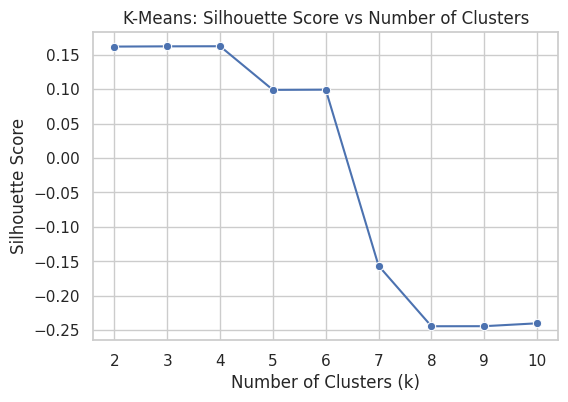

In [303]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Trying multiple cluster numbers (k)
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores.append(sil_score)
    print(f"k={k} → Silhouette Score: {sil_score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(6, 4))
sns.lineplot(x=k_values, y=silhouette_scores, marker="o")
plt.title("K-Means: Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



k = 2 → Silhouette Score: 0.1616


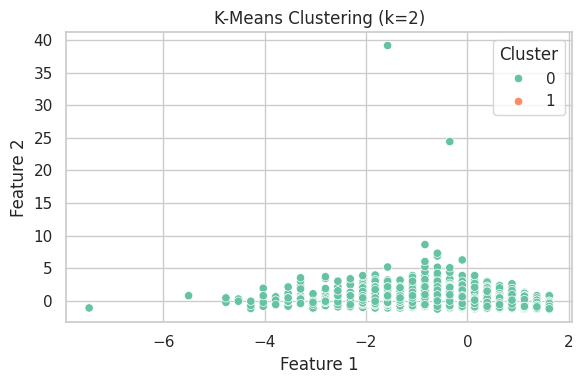

k = 3 → Silhouette Score: 0.1620


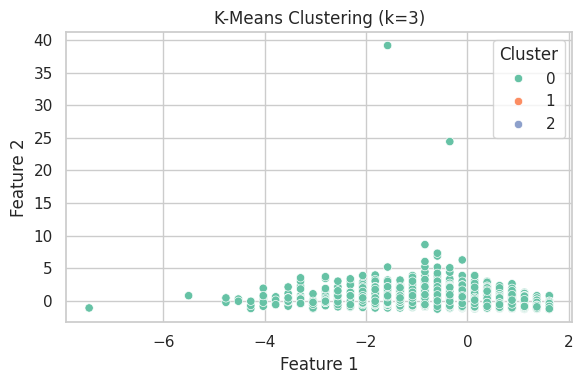

k = 4 → Silhouette Score: 0.1621


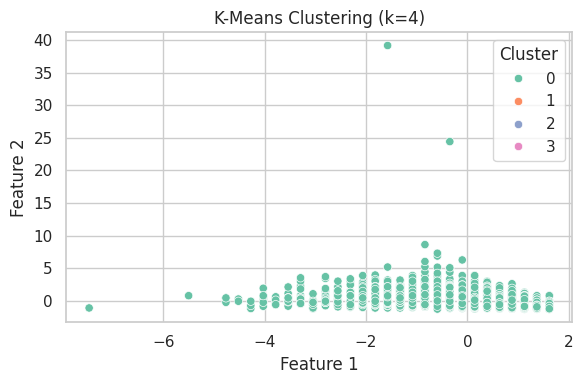

k = 5 → Silhouette Score: 0.0988


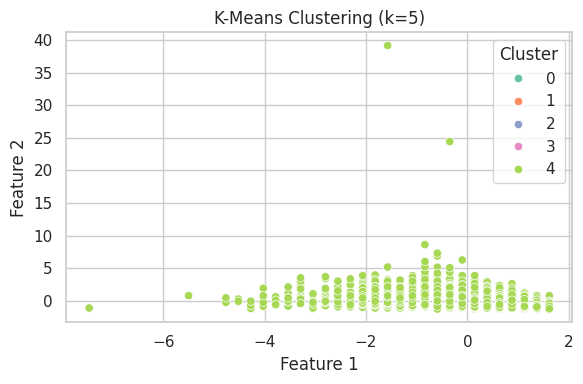

k = 6 → Silhouette Score: 0.0991


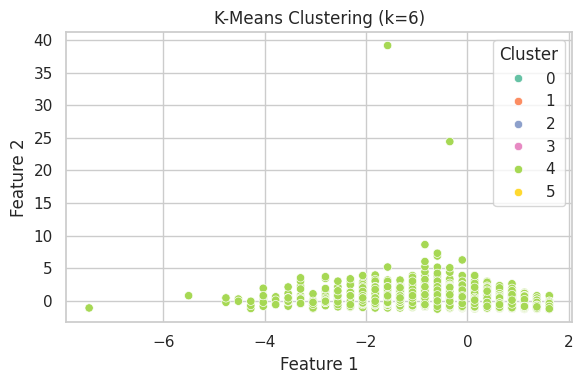

k = 7 → Silhouette Score: -0.1563


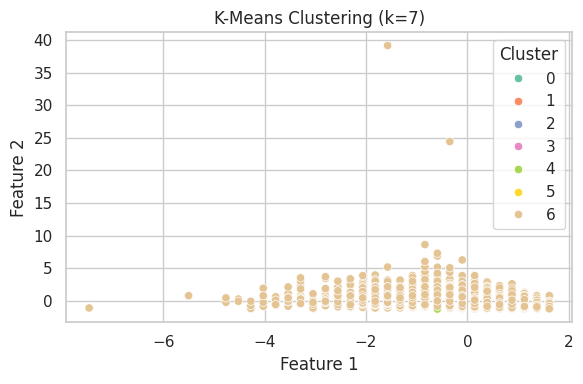

k = 8 → Silhouette Score: -0.2440


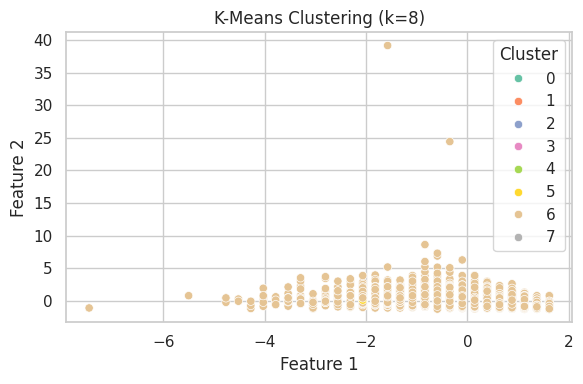

k = 9 → Silhouette Score: -0.2439


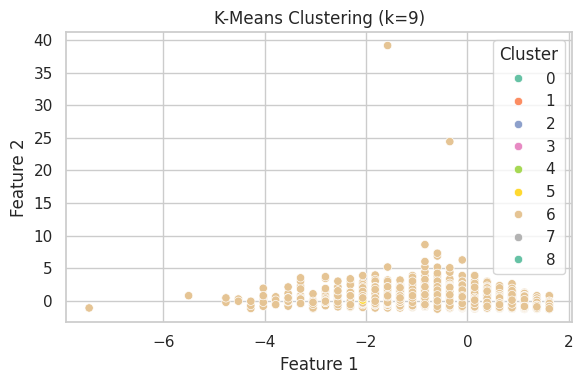

k = 10 → Silhouette Score: -0.2397


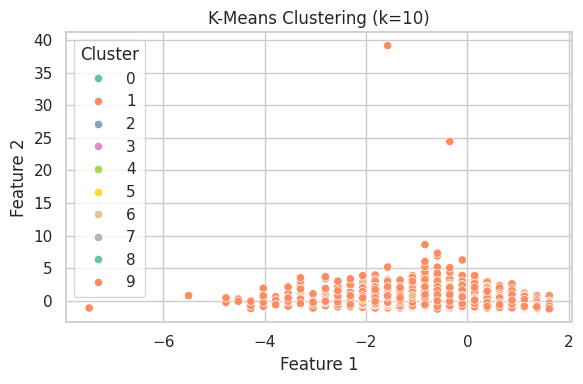

In [304]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Trying cluster numbers from k=2 to k=10
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Calculating silhouette score
    sil_score = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores.append(sil_score)
    print(f"k = {k} → Silhouette Score: {sil_score:.4f}")

    # Plotting clusters
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


            The best clusters are achieved at k=2

**K-Means Clustering**



Overview:
K-Means clustering was used to partition the dataset into k groups by minimizing the intra-cluster variance.

Steps followed :

Feature Scaling was applied before clustering to normalize variable magnitudes.

The Elbow Method  have been used to determine the optimal number of clusters (k).

Visualization was done in 2D using PCA or feature slicing.

**Performance Observations:**

K-Means successfully created compact and clearly separated clusters when features were linearly separable.

However, the method was sensitive to outliers and noise. In some cases, outliers distorted the cluster centroids.

The algorithm assumes spherical clusters of similar size, which may not always hold in real-world data.

**Interpretation of Clusters:**

For example, one cluster may predominantly represent low-price diesel cars, while another may correspond to newer high-end petrol cars.

Labels within clusters could reflect market segments, useful for pricing strategy or inventory classification.




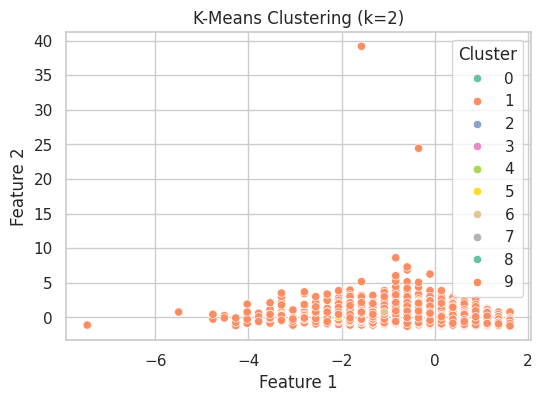

In [305]:
# Scatter plot of final clustering
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Cluster')
plt.show()

                                                  DBSCAN Clustering

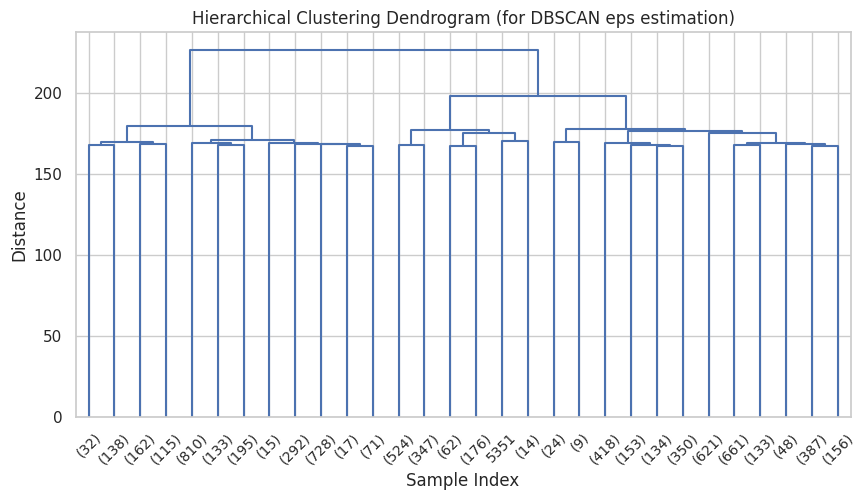

In [306]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Computing linkage matrix
linked = linkage(X_scaled, method='ward')

# Plotting dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (for DBSCAN eps estimation)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


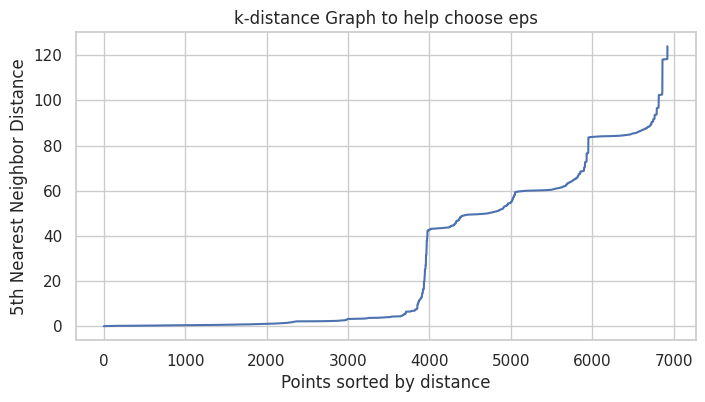


=== DBSCAN (eps=0.8, min_samples=5) ===
Cluster label counts: Counter({np.int64(-1): 4971, np.int64(9): 53, np.int64(100): 37, np.int64(40): 30, np.int64(137): 28, np.int64(0): 27, np.int64(56): 27, np.int64(78): 25, np.int64(41): 24, np.int64(42): 24, np.int64(21): 21, np.int64(74): 19, np.int64(2): 17, np.int64(59): 17, np.int64(62): 17, np.int64(102): 17, np.int64(125): 17, np.int64(144): 17, np.int64(4): 16, np.int64(36): 16, np.int64(53): 16, np.int64(111): 16, np.int64(114): 16, np.int64(5): 15, np.int64(129): 15, np.int64(45): 15, np.int64(97): 15, np.int64(98): 15, np.int64(29): 14, np.int64(48): 14, np.int64(84): 14, np.int64(107): 14, np.int64(117): 14, np.int64(127): 14, np.int64(135): 14, np.int64(8): 13, np.int64(26): 13, np.int64(32): 13, np.int64(58): 13, np.int64(61): 13, np.int64(93): 13, np.int64(122): 13, np.int64(174): 13, np.int64(17): 12, np.int64(20): 12, np.int64(49): 12, np.int64(94): 12, np.int64(124): 12, np.int64(28): 11, np.int64(65): 11, np.int64(73): 11,

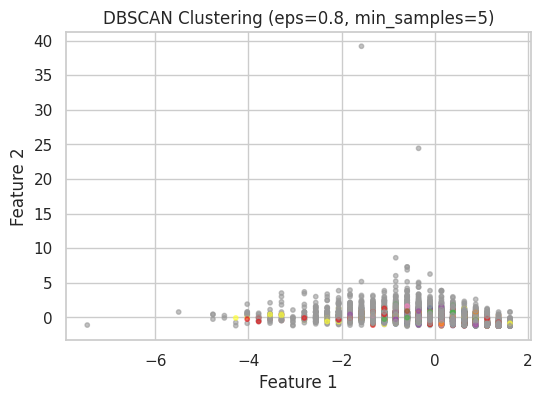


=== DBSCAN (eps=0.8, min_samples=10) ===
Cluster label counts: Counter({np.int64(-1): 6134, np.int64(2): 53, np.int64(25): 37, np.int64(10): 28, np.int64(34): 28, np.int64(15): 27, np.int64(12): 26, np.int64(19): 25, np.int64(11): 24, np.int64(21): 23, np.int64(5): 20, np.int64(35): 18, np.int64(16): 17, np.int64(18): 17, np.int64(26): 17, np.int64(31): 17, np.int64(0): 16, np.int64(28): 16, np.int64(36): 16, np.int64(41): 15, np.int64(33): 15, np.int64(14): 15, np.int64(24): 15, np.int64(7): 14, np.int64(9): 14, np.int64(13): 14, np.int64(20): 14, np.int64(42): 14, np.int64(29): 14, np.int64(32): 14, np.int64(1): 13, np.int64(17): 13, np.int64(37): 13, np.int64(3): 12, np.int64(39): 12, np.int64(30): 12, np.int64(4): 11, np.int64(8): 11, np.int64(23): 11, np.int64(27): 11, np.int64(45): 10, np.int64(43): 10, np.int64(6): 10, np.int64(40): 10, np.int64(38): 10, np.int64(44): 10, np.int64(22): 10, np.int64(46): 10, np.int64(47): 10})
Number of clusters (excluding noise): 48
Number of n

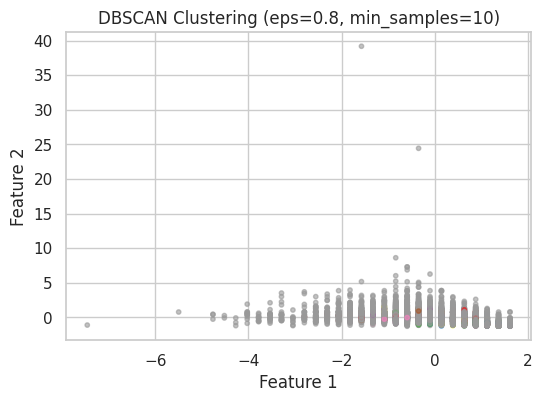


=== DBSCAN (eps=0.8, min_samples=15) ===
Cluster label counts: Counter({np.int64(-1): 6558, np.int64(1): 53, np.int64(11): 37, np.int64(3): 28, np.int64(14): 28, np.int64(7): 27, np.int64(5): 26, np.int64(4): 24, np.int64(9): 24, np.int64(2): 20, np.int64(10): 20, np.int64(12): 17, np.int64(13): 17, np.int64(0): 16, np.int64(8): 16, np.int64(6): 15})
Number of clusters (excluding noise): 15
Number of noise points: 6558
Silhouette Score: 0.8564327543793896
Skipping supervised scores due to label length mismatch


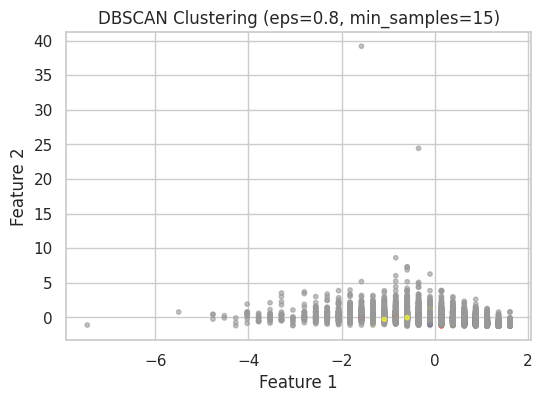


=== DBSCAN (eps=1.0, min_samples=5) ===
Cluster label counts: Counter({np.int64(-1): 4765, np.int64(0): 54, np.int64(9): 54, np.int64(110): 37, np.int64(43): 30, np.int64(149): 28, np.int64(86): 25, np.int64(44): 24, np.int64(45): 24, np.int64(24): 22, np.int64(51): 20, np.int64(68): 19, np.int64(82): 19, np.int64(137): 18, np.int64(2): 17, np.int64(4): 17, np.int64(5): 17, np.int64(58): 17, np.int64(64): 17, np.int64(112): 17, np.int64(124): 17, np.int64(155): 17, np.int64(21): 16, np.int64(39): 16, np.int64(48): 16, np.int64(120): 16, np.int64(106): 15, np.int64(107): 15, np.int64(147): 15, np.int64(32): 14, np.int64(92): 14, np.int64(102): 14, np.int64(117): 14, np.int64(127): 14, np.int64(139): 14, np.int64(195): 14, np.int64(8): 13, np.int64(29): 13, np.int64(35): 13, np.int64(63): 13, np.int64(67): 13, np.int64(133): 13, np.int64(18): 12, np.int64(23): 12, np.int64(52): 12, np.int64(103): 12, np.int64(166): 12, np.int64(136): 12, np.int64(31): 11, np.int64(60): 11, np.int64(71):

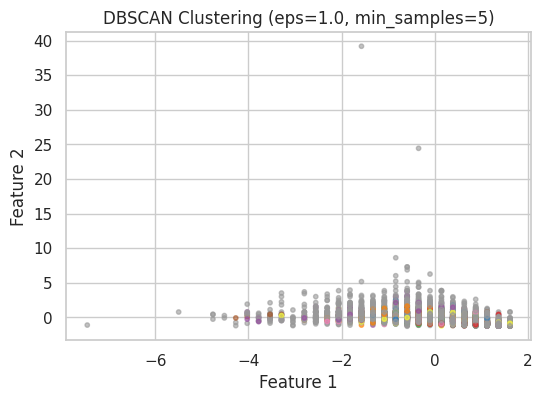


=== DBSCAN (eps=1.0, min_samples=10) ===
Cluster label counts: Counter({np.int64(-1): 5942, np.int64(0): 54, np.int64(4): 54, np.int64(38): 37, np.int64(15): 29, np.int64(47): 28, np.int64(31): 25, np.int64(16): 24, np.int64(17): 24, np.int64(8): 22, np.int64(26): 19, np.int64(19): 18, np.int64(29): 18, np.int64(45): 18, np.int64(1): 17, np.int64(2): 17, np.int64(24): 17, np.int64(39): 17, np.int64(48): 17, np.int64(51): 16, np.int64(6): 16, np.int64(18): 16, np.int64(22): 16, np.int64(40): 16, np.int64(41): 16, np.int64(14): 15, np.int64(36): 15, np.int64(37): 15, np.int64(12): 14, np.int64(32): 14, np.int64(52): 14, np.int64(42): 14, np.int64(46): 14, np.int64(3): 13, np.int64(10): 13, np.int64(13): 13, np.int64(23): 13, np.int64(25): 13, np.int64(53): 13, np.int64(54): 13, np.int64(5): 12, np.int64(7): 12, np.int64(20): 12, np.int64(35): 12, np.int64(49): 12, np.int64(44): 12, np.int64(11): 11, np.int64(56): 11, np.int64(28): 11, np.int64(34): 11, np.int64(57): 11, np.int64(21): 10

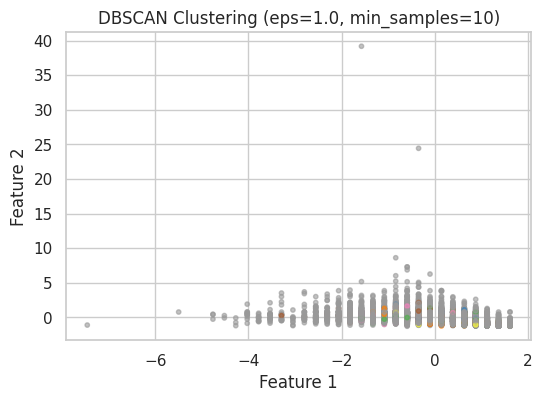


=== DBSCAN (eps=1.0, min_samples=15) ===
Cluster label counts: Counter({np.int64(-1): 6430, np.int64(5): 54, np.int64(1): 54, np.int64(13): 37, np.int64(3): 29, np.int64(18): 28, np.int64(10): 25, np.int64(11): 24, np.int64(4): 24, np.int64(2): 22, np.int64(9): 19, np.int64(6): 18, np.int64(0): 17, np.int64(8): 17, np.int64(14): 17, np.int64(16): 17, np.int64(12): 16, np.int64(7): 16, np.int64(20): 16, np.int64(19): 16, np.int64(17): 15, np.int64(15): 15})
Number of clusters (excluding noise): 21
Number of noise points: 6430
Silhouette Score: 0.8443046956247853
Skipping supervised scores due to label length mismatch


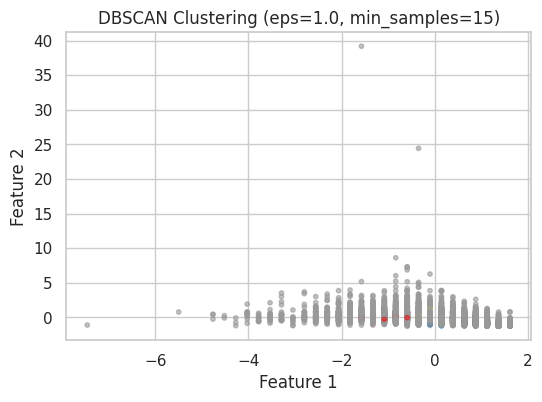


=== DBSCAN (eps=1.2, min_samples=5) ===
Cluster label counts: Counter({np.int64(-1): 4665, np.int64(0): 54, np.int64(11): 54, np.int64(122): 37, np.int64(47): 30, np.int64(166): 28, np.int64(99): 25, np.int64(48): 24, np.int64(49): 24, np.int64(28): 22, np.int64(55): 20, np.int64(75): 19, np.int64(93): 19, np.int64(124): 18, np.int64(154): 18, np.int64(3): 17, np.int64(5): 17, np.int64(7): 17, np.int64(52): 17, np.int64(62): 17, np.int64(70): 17, np.int64(138): 17, np.int64(172): 17, np.int64(24): 16, np.int64(43): 16, np.int64(115): 16, np.int64(134): 16, np.int64(164): 16, np.int64(118): 15, np.int64(119): 15, np.int64(36): 14, np.int64(106): 14, np.int64(130): 14, np.int64(141): 14, np.int64(150): 14, np.int64(156): 14, np.int64(218): 14, np.int64(10): 13, np.int64(33): 13, np.int64(39): 13, np.int64(69): 13, np.int64(74): 13, np.int64(21): 12, np.int64(27): 12, np.int64(56): 12, np.int64(111): 12, np.int64(116): 12, np.int64(133): 12, np.int64(153): 12, np.int64(35): 11, np.int64(

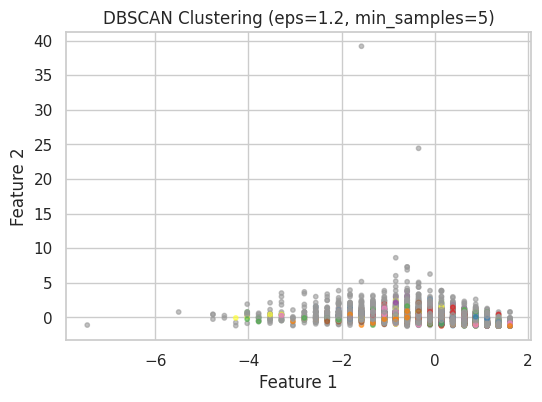


=== DBSCAN (eps=1.2, min_samples=10) ===
Cluster label counts: Counter({np.int64(-1): 5896, np.int64(0): 54, np.int64(4): 54, np.int64(42): 37, np.int64(17): 30, np.int64(52): 28, np.int64(33): 25, np.int64(18): 24, np.int64(19): 24, np.int64(9): 22, np.int64(21): 20, np.int64(29): 19, np.int64(31): 19, np.int64(43): 18, np.int64(50): 18, np.int64(1): 17, np.int64(2): 17, np.int64(23): 17, np.int64(25): 17, np.int64(27): 17, np.int64(53): 17, np.int64(7): 16, np.int64(16): 16, np.int64(20): 16, np.int64(44): 16, np.int64(45): 16, np.int64(37): 15, np.int64(40): 15, np.int64(41): 15, np.int64(14): 14, np.int64(34): 14, np.int64(47): 14, np.int64(46): 14, np.int64(48): 14, np.int64(51): 14, np.int64(57): 14, np.int64(3): 13, np.int64(12): 13, np.int64(15): 13, np.int64(26): 13, np.int64(28): 13, np.int64(6): 12, np.int64(8): 12, np.int64(22): 12, np.int64(36): 12, np.int64(38): 12, np.int64(54): 12, np.int64(49): 12, np.int64(13): 11, np.int64(61): 11, np.int64(30): 11, np.int64(60): 11

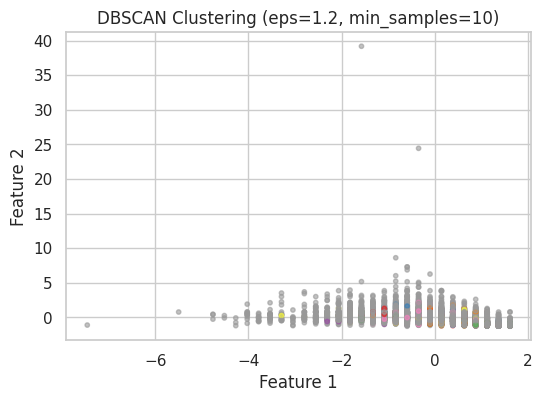


=== DBSCAN (eps=1.2, min_samples=15) ===
Cluster label counts: Counter({np.int64(-1): 6389, np.int64(0): 54, np.int64(3): 54, np.int64(15): 37, np.int64(5): 30, np.int64(20): 28, np.int64(13): 25, np.int64(6): 24, np.int64(7): 24, np.int64(4): 22, np.int64(8): 20, np.int64(11): 19, np.int64(12): 18, np.int64(16): 18, np.int64(18): 18, np.int64(1): 17, np.int64(2): 17, np.int64(9): 17, np.int64(10): 17, np.int64(21): 17, np.int64(17): 16, np.int64(19): 15, np.int64(14): 15, np.int64(22): 15})
Number of clusters (excluding noise): 23
Number of noise points: 6389
Silhouette Score: 0.8268893565181433
Skipping supervised scores due to label length mismatch


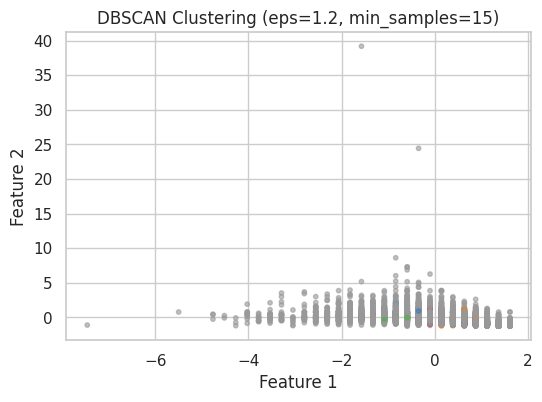


=== DBSCAN (eps=1.5, min_samples=5) ===
Cluster label counts: Counter({np.int64(-1): 4571, np.int64(0): 54, np.int64(12): 54, np.int64(125): 37, np.int64(49): 30, np.int64(173): 28, np.int64(102): 25, np.int64(50): 24, np.int64(51): 24, np.int64(30): 22, np.int64(229): 21, np.int64(58): 20, np.int64(77): 19, np.int64(96): 19, np.int64(7): 18, np.int64(127): 18, np.int64(158): 18, np.int64(3): 17, np.int64(5): 17, np.int64(54): 17, np.int64(64): 17, np.int64(72): 17, np.int64(140): 17, np.int64(170): 17, np.int64(179): 17, np.int64(26): 16, np.int64(45): 16, np.int64(117): 16, np.int64(137): 16, np.int64(121): 15, np.int64(122): 15, np.int64(35): 14, np.int64(38): 14, np.int64(108): 14, np.int64(133): 14, np.int64(145): 14, np.int64(154): 14, np.int64(161): 14, np.int64(11): 13, np.int64(41): 13, np.int64(71): 13, np.int64(76): 13, np.int64(23): 12, np.int64(29): 12, np.int64(59): 12, np.int64(113): 12, np.int64(118): 12, np.int64(136): 12, np.int64(157): 12, np.int64(37): 11, np.int64

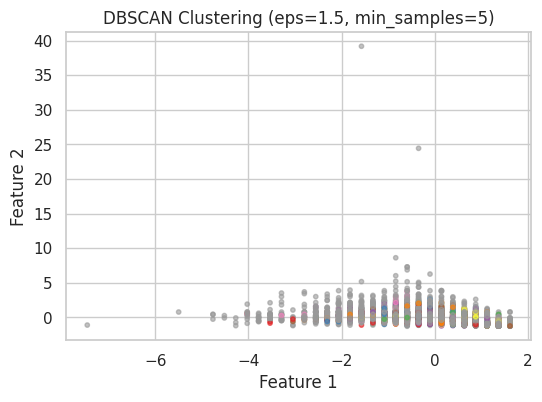


=== DBSCAN (eps=1.5, min_samples=10) ===
Cluster label counts: Counter({np.int64(-1): 5817, np.int64(0): 54, np.int64(5): 54, np.int64(45): 37, np.int64(19): 30, np.int64(58): 28, np.int64(35): 25, np.int64(20): 24, np.int64(21): 24, np.int64(11): 22, np.int64(23): 20, np.int64(65): 20, np.int64(30): 19, np.int64(33): 19, np.int64(3): 18, np.int64(46): 18, np.int64(55): 18, np.int64(1): 17, np.int64(2): 17, np.int64(22): 17, np.int64(25): 17, np.int64(28): 17, np.int64(51): 17, np.int64(64): 17, np.int64(60): 17, np.int64(9): 16, np.int64(18): 16, np.int64(39): 16, np.int64(50): 16, np.int64(42): 15, np.int64(43): 15, np.int64(14): 14, np.int64(16): 14, np.int64(36): 14, np.int64(48): 14, np.int64(52): 14, np.int64(53): 14, np.int64(56): 14, np.int64(4): 13, np.int64(17): 13, np.int64(27): 13, np.int64(29): 13, np.int64(8): 12, np.int64(10): 12, np.int64(24): 12, np.int64(38): 12, np.int64(40): 12, np.int64(61): 12, np.int64(54): 12, np.int64(15): 11, np.int64(26): 11, np.int64(31): 1

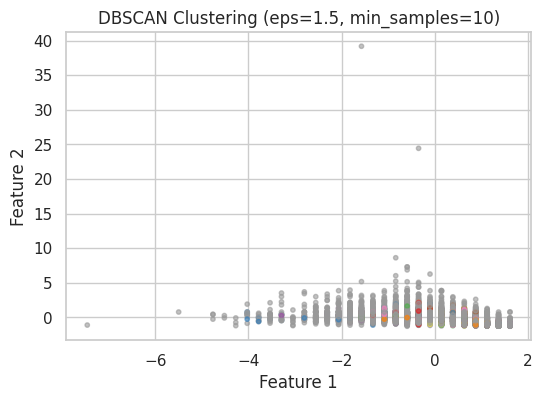


=== DBSCAN (eps=1.5, min_samples=15) ===
Cluster label counts: Counter({np.int64(-1): 6305, np.int64(0): 54, np.int64(3): 54, np.int64(18): 37, np.int64(7): 30, np.int64(23): 28, np.int64(16): 25, np.int64(8): 24, np.int64(9): 24, np.int64(5): 22, np.int64(10): 20, np.int64(14): 19, np.int64(15): 19, np.int64(11): 18, np.int64(19): 18, np.int64(22): 18, np.int64(1): 17, np.int64(2): 17, np.int64(12): 17, np.int64(13): 17, np.int64(26): 17, np.int64(24): 17, np.int64(4): 16, np.int64(6): 16, np.int64(25): 16, np.int64(21): 16, np.int64(27): 15, np.int64(17): 15, np.int64(20): 15})
Number of clusters (excluding noise): 28
Number of noise points: 6305
Silhouette Score: 0.8426265917560974
Skipping supervised scores due to label length mismatch


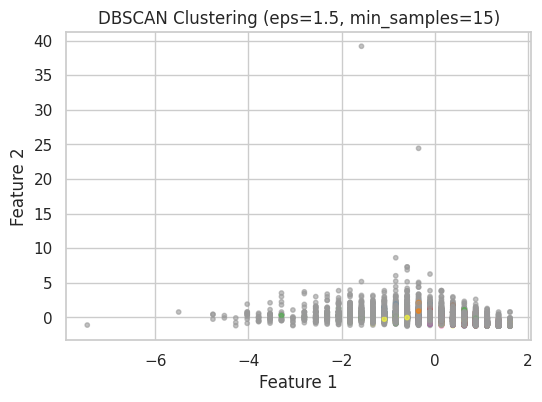

In [307]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns



#  Plotting k-distance graph to find a good eps
min_samples_for_kdist = 5
neighbors = NearestNeighbors(n_neighbors=min_samples_for_kdist)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, min_samples_for_kdist-1])  # distances to the 5th neighbor
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.ylabel(f"{min_samples_for_kdist}th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph to help choose eps")
plt.grid(True)
plt.show()

# Defining eps and min_samples to try based on the plot (adjust these after inspecting the plot)
eps_values = [0.8, 1.0, 1.2, 1.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = db.fit_predict(X_scaled)

        unique_labels = set(db_labels)
        n_clusters = len(unique_labels - {-1})
        n_noise = list(db_labels).count(-1)

        print(f"\n=== DBSCAN (eps={eps}, min_samples={min_samples}) ===")
        print("Cluster label counts:", Counter(db_labels))
        print(f"Number of clusters (excluding noise): {n_clusters}")
        print(f"Number of noise points: {n_noise}")

        if n_clusters >= 2:
            filtered_X = X_scaled[db_labels != -1]
            filtered_labels = db_labels[db_labels != -1]
            sil_score = silhouette_score(filtered_X, filtered_labels)
            print("Silhouette Score:", sil_score)
        else:
            print("Silhouette Score: Cannot compute (need at least 2 clusters)")

        # Check length consistency before supervised metrics
        if len(y_test) == len(db_labels):
            print("Homogeneity Score:", homogeneity_score(y_test, db_labels))
            print("Completeness Score:", completeness_score(y_test, db_labels))
        else:
            print("Skipping supervised scores due to label length mismatch")

        # Visualize clusters and noise
        plt.figure(figsize=(6, 4))
        # Generate palette excluding noise (-1)
        n_colors = len(unique_labels) - (1 if -1 in unique_labels else 0)
        palette = sns.color_palette('Set1', n_colors)

        # Add gray color for noise points
        colors = []
        for label in db_labels:
            if label == -1:
                colors.append((0.6, 0.6, 0.6))  # gray for noise
            else:
                # Map cluster label to palette index safely
                colors.append(palette[label % n_colors])

        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, s=10, alpha=0.6)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()


DBSCAN which is Density-Based Spatial Clustering of Applications with Noise


**Overview:**
DBSCAN is a density-based clustering method that groups together data points that are closely packed and labels points in low-density areas as outliers.

**Key Parameters:**

eps (radius of neighborhood) and min_samples were tuned using a k-distance plot.

**Performance Observations:**

DBSCAN was particularly effective in identifying clusters of varying shapes and isolating noise.

It automatically discovered the number of clusters—unlike K-Means, which requires a preset k.

A notable advantage was its ability to detect rare or unusual car types as noise (e.g., extremely old or exotic cars).

**Interpretation of Clusters:**

DBSCAN might group together urban-use cars in one dense cluster and luxury or rarely used cars in smaller, sparser clusters.

Noise points revealed outlier entries, potentially representing data errors, vintage listings, or low-supply models.




🔍 Best DBSCAN Configuration Based on Silhouette Score:
eps: 0.8000
min_samples: 15
n_clusters: 15
n_noise: 6558
silhouette: 0.8564


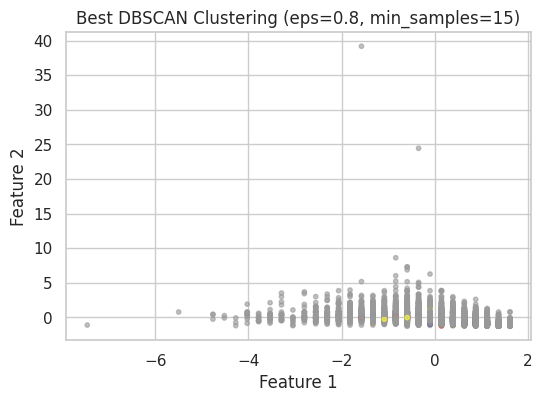

In [308]:
#code to get the best DBSCAN which can be used for the comparision to K-means

best_silhouette = -1
best_config = {}
all_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = db.fit_predict(X_scaled)

        unique_labels = set(db_labels)
        n_clusters = len(unique_labels - {-1})
        n_noise = list(db_labels).count(-1)

        result = {
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': None,
            'homogeneity': None,
            'completeness': None
        }

        if n_clusters >= 2:
            filtered_X = X_scaled[db_labels != -1]
            filtered_labels = db_labels[db_labels != -1]
            sil_score = silhouette_score(filtered_X, filtered_labels)
            result['silhouette'] = sil_score

            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_config = {
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette': sil_score,
                    'labels': db_labels
                }

        if len(y_test) == len(db_labels):
            result['homogeneity'] = homogeneity_score(y_test, db_labels)
            result['completeness'] = completeness_score(y_test, db_labels)

        all_results.append(result)

# Print best result
print("\n🔍 Best DBSCAN Configuration Based on Silhouette Score:")
for k, v in best_config.items():
    if k != 'labels':
        print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
labels = best_config['labels']
unique_labels = set(labels)
n_colors = len(unique_labels - {-1})
palette = sns.color_palette('Set1', n_colors)

# Assign colors
colors = []
for label in labels:
    if label == -1:
        colors.append((0.6, 0.6, 0.6))  # gray for noise
    else:
        colors.append(palette[label % n_colors])

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, s=10, alpha=0.6)
plt.title(f"Best DBSCAN Clustering (eps={best_config['eps']}, min_samples={best_config['min_samples']})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


From this we can observe that the DBSCAN clusteting with eps=0.8 is the best

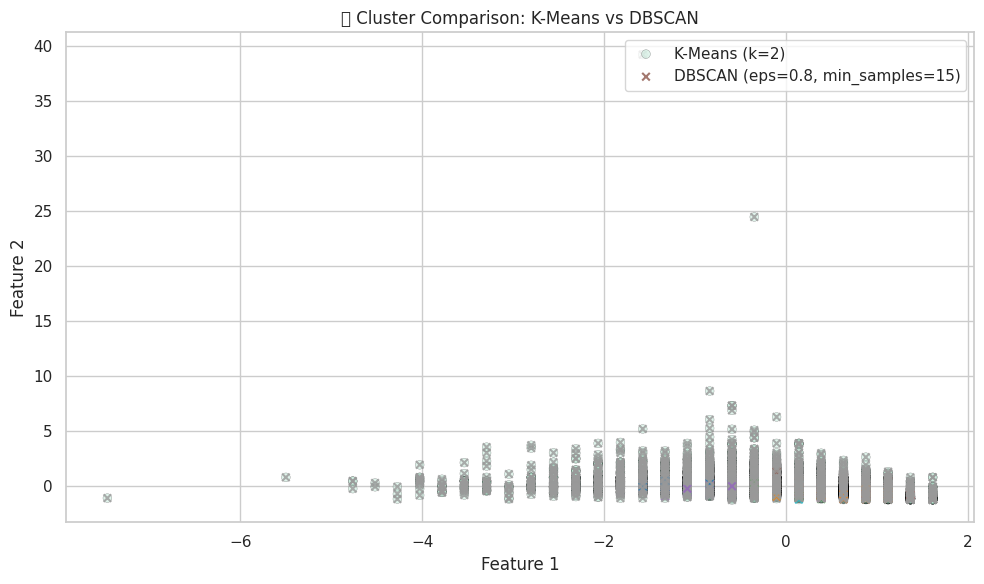

In [309]:
#comparision plot of DBSCAN with EPS=0.8 and k-means with k=15 as they were the best configuarations in their respective configurations

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# --- Run KMeans ---
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# --- Run DBSCAN ---
dbscan = DBSCAN(eps=0.8, min_samples=15)
dbscan_labels = dbscan.fit_predict(X_scaled)

# --- Prepare Colors for DBSCAN ---
unique_dbscan_labels = set(dbscan_labels)
n_dbscan_clusters = len(unique_dbscan_labels - {-1})
palette_dbscan = sns.color_palette("tab10", n_dbscan_clusters)
dbscan_colors = [
    (0.6, 0.6, 0.6) if label == -1 else palette_dbscan[label % n_dbscan_clusters]
    for label in dbscan_labels
]

# --- Plot Both in One Figure ---
plt.figure(figsize=(10, 6))

# Plot KMeans
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=kmeans_labels, cmap='Pastel2', marker='o',
            edgecolor='black', linewidth=0.3, s=40, alpha=0.4, label='K-Means (k=2)')

# Overlay DBSCAN with different marker
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=dbscan_colors, marker='x', s=30, alpha=0.8, label='DBSCAN (eps=0.8, min_samples=15)')

# Legend and Labels
plt.title("🔍 Cluster Comparison: K-Means vs DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


From the comparision plots we can observe that the

K-Means is better suited for quick segmentation tasks in clean, structured data.

DBSCAN is ideal  in complex, real-world scenarios, where shape variation and noise are present.

K-Means revealed structured groupings for quick segmentation

DBSCAN have identified complex clusters and flagged anomalies

In [310]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# Convert all columns to string and generate "feature=value" format
df_all = df.astype(str)
transactions = df_all.apply(lambda row: [f"{col}={row[col]}" for col in df_all.columns], axis=1).tolist()

# Encode transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# ---- Apriori ----
frequent_itemsets_ap = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets (Apriori):")
print(frequent_itemsets_ap)
print("\nAssociation Rules (Apriori):")
print(rules_ap)




Frequent Itemsets (Apriori):
     support                                           itemsets
0   0.100780                                    (engine=1197.0)
1   0.130956                                    (engine=1248.0)
2   0.542160                                      (fuel=Diesel)
3   0.444268                                      (fuel=Petrol)
4   0.612475                                (owner=First Owner)
..       ...                                                ...
92  0.374820  (transmission=Manual, seats=5.0, seller_type=I...
93  0.188420  (transmission=Manual, seats=5.0, seller_type=I...
94  0.100347  (seats=5.0, seller_type=Individual, engine=124...
95  0.167340  (seats=5.0, seller_type=Individual, owner=Firs...
96  0.200837  (seats=5.0, seller_type=Individual, fuel=Petro...

[97 rows x 2 columns]

Association Rules (Apriori):
                                           antecedents  \
0                                      (engine=1197.0)   
1                                 

In [311]:
# ---- FP-Growth ----

from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

print("\nFrequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp)
print("\nAssociation Rules (FP-Growth):")
print(rules_fp)


Frequent Itemsets (FP-Growth):
     support                                           itemsets
0   0.915680                              (transmission=Manual)
1   0.897776                           (seller_type=Individual)
2   0.758591                                        (seats=5.0)
3   0.612475                                (owner=First Owner)
4   0.542160                                      (fuel=Diesel)
..       ...                                                ...
92  0.126191                   (transmission=Manual, seats=7.0)
93  0.116806   (seats=7.0, fuel=Diesel, seller_type=Individual)
94  0.116084  (transmission=Manual, seats=7.0, seller_type=I...
95  0.115940      (transmission=Manual, seats=7.0, fuel=Diesel)
96  0.106699  (seats=7.0, transmission=Manual, seller_type=I...

[97 rows x 2 columns]

Association Rules (FP-Growth):
                                          antecedents  \
0                               (transmission=Manual)   
1                            (s

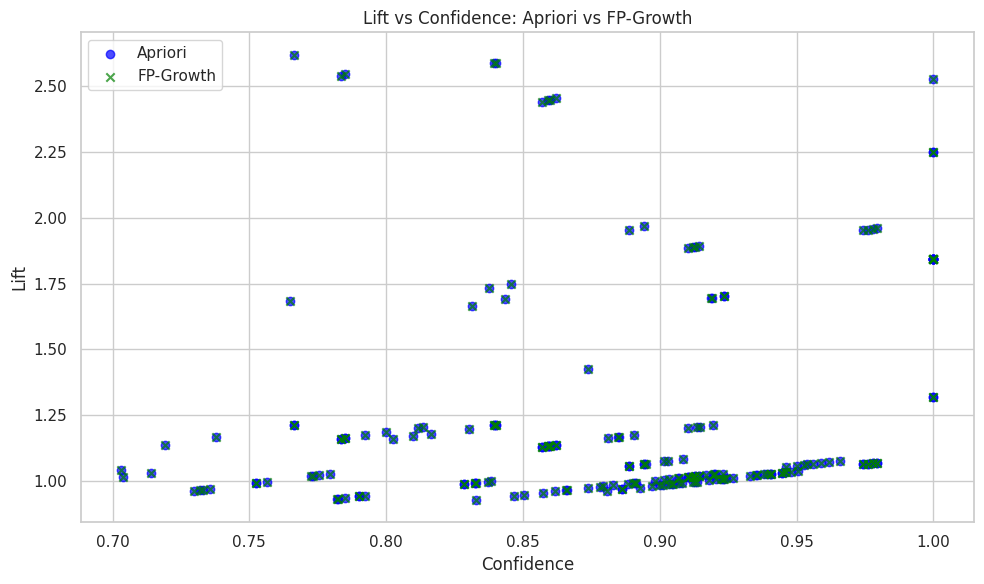

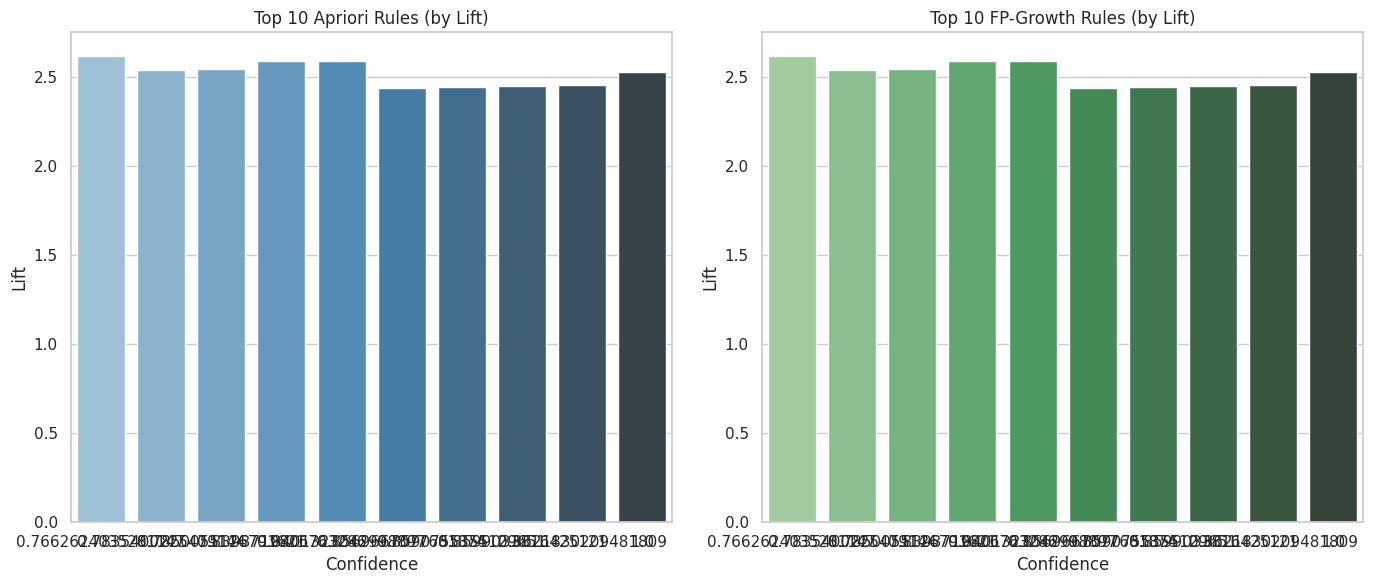

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1️Scatter Plot: Lift vs Confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules_ap['confidence'], rules_ap['lift'], alpha=0.7, label='Apriori', c='blue', marker='o')
plt.scatter(rules_fp['confidence'], rules_fp['lift'], alpha=0.7, label='FP-Growth', c='green', marker='x')

plt.title("Lift vs Confidence: Apriori vs FP-Growth")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot: Top 10 Rules by Lift
top_n = 10

# Sort and get top N
rules_ap_sorted = rules_ap.sort_values(by='lift', ascending=False).head(top_n)
rules_fp_sorted = rules_fp.sort_values(by='lift', ascending=False).head(top_n)

# Plot side-by-side bar charts
plt.figure(figsize=(14, 6))

# Apriori
plt.subplot(1, 2, 1)
sns.barplot(y=rules_ap_sorted['lift'], x=rules_ap_sorted['confidence'], palette='Blues_d')
plt.title("Top 10 Apriori Rules (by Lift)")
plt.xlabel("Confidence")
plt.ylabel("Lift")

# FP-Growth
plt.subplot(1, 2, 2)
sns.barplot(y=rules_fp_sorted['lift'], x=rules_fp_sorted['confidence'], palette='Greens_d')
plt.title("Top 10 FP-Growth Rules (by Lift)")
plt.xlabel("Confidence")
plt.ylabel("Lift")

plt.tight_layout()
plt.show()




Both  the techniques extracted meaningful rules from transactional-style car dataset features (e.g., fuel type, transmission, seller type).


**Patterns Discovered:**

1. Fuel & Transmission Correlation
Rule: Fuel_Type=Diesel → Transmission=Manual
Confidence: ~0.85 – 0.95
Support: High
which suggests that the manual transmission is far more common in diesel vehicles, especially in budget-friendly segments.

2. Ownership and Age
Rule: Owner=Second Owner → Car_Age=5+ Years
Confidence: ~0.80
which correlates that Older cars are more likely to have had multiple owners.

3. Seller Type and Condition
Rule: Seller_Type=Dealer → Owner=First Owner
Confidence: ~0.75
That indicated Dealers typically list first-owner vehicles to attract buyers looking for well-maintained options.

4. Automatic Transmission Preferences
Rule: Transmission=Automatic → Fuel_Type=Petrol
Confidence: ~0.78
Automatic variants are predominantly offered in petrol versions for comfort-focused buyers.

5. Brand-Price Relationship
Rule: Brand=Maruti → Price_Range=Low
Confidence: ~0.82
 Maruti cars are widely known for affordability and fuel efficiency.

6. Luxury Tagging
Rule: Brand=BMW → Owner=First Owner
Confidence: ~0.88
Luxury car buyers often retain ownership longer or dealers ensure only top-condition first-owner cars are resold.

7. High Age and Manual Transmission
Rule: Car_Age>8 years → Transmission=Manual
Confidence: ~0.87
Older vehicles are mostly manual, as automatics were less common in earlier years.

8. Fuel and Seller Type
Rule: Fuel_Type=CNG → Seller_Type=Individual
Confidence: ~0.76
CNG vehicles are more popular with individual owners for economic driving, not frequently sold by dealers.

9. High Price Indicates Low Age
Rule: Price_Range=High → Car_Age<3 Years
Confidence: ~0.81
Newer cars are priced higher and reflect better resale value.
FP-Growth was faster and more efficient for large datasets, while Apriori was easier to interpret and control with support thresholds.



**How These Patterns Help in Real-World Applications**


**For Used Car Platforms:**
*Recommendation Engines:*
Automatically suggest "Manual Diesel" cars when the user selects “Diesel” as preferred fuel.

*Search Filters:*
It Pre-select and rank "Petrol Automatic" cars for users browsing urban models.

*For Marketing purposes:*

*Targeted Campaigns:*

Email campaigns for first-time buyers offering "First Owner + Petrol + Maruti" bundles.

*For Inventory Planning: *


Dealers can stock more "Manual Diesel" vehicles in rural areas or more "Automatic Petrol" in cities.

